# Single-Cell RNA-seq Analysis Workshop
## From Raw Data to Biological Insights with AI Assistance

**Welcome!** In this 2-hour workshop, you'll learn to:
- Load and quality control single-cell RNA-seq data
- Apply dimensionality reduction (PCA, UMAP)
- Perform clustering and identify cell types
- Use AI assistants to accelerate your analysis

### Before You Start:
1. **Make a copy** of this notebook: `File > Save a copy in Drive`
2. **Run cells** with `Shift + Enter` or click the play button ▶️
3. **Get help** from AI: Use ChatGPT, Claude, or Gemini when stuck!

---

## Part 1: Setup & Installation

First, we'll install the necessary packages. This may take 2-3 minutes.

In [1]:
# Install scanpy and dependencies
!pip install -q scanpy[leiden] matplotlib numpy pandas

print("Installation complete!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 3.1 MB/s eta 0:00:00
Installation complete!


## Part 2: Load Libraries

Let's import the tools we'll use today:
- **scanpy**: Single-cell analysis in Python
- **matplotlib**: Visualization
- **numpy/pandas**: Data manipulation

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings for nice plots
sc.settings.verbosity = 1  # Reduce output verbosity
sc.settings.set_figure_params(dpi=80, facecolor='white')

print("Libraries loaded successfully!")
print(f"Scanpy version: {sc.__version__}")

Libraries loaded successfully!
Scanpy version: 1.11.5


/tmp/ipython-input-1123108331.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  print(f"Scanpy version: {sc.__version__}")


## Part 3: Load Dataset

We'll use a classic dataset: **3,000 Peripheral Blood Mononuclear Cells (PBMCs)** from a healthy donor.

PBMCs include:
- T cells (CD4+, CD8+)
- B cells
- NK cells
- Monocytes
- Dendritic cells

**This dataset is pre-processed** (quality control already done) so we can focus on analysis!

In [3]:
# Load the preprocessed PBMC dataset
adata = sc.datasets.pbmc3k_processed()

# What do we have?
print(f"   Dataset overview:")
print(f"   Cells: {adata.n_obs:,}")
print(f"   Genes: {adata.n_vars:,}")
print(f"   Shape: {adata.shape}")
print(f"   This means we have {adata.n_obs} cells, each measured across {adata.n_vars} genes!")

# Look at the structure
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

   Dataset overview:
   Cells: 2,638
   Genes: 1,838
   Shape: (2638, 1838)
   This means we have 2638 cells, each measured across 1838 genes!


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Discussion Questions:
1. Why 3,000 cells? Is that a lot?
2. What does each "observation" represent?
3. What do you think is in the `X` matrix?

---

## Part 4: Explore the Data


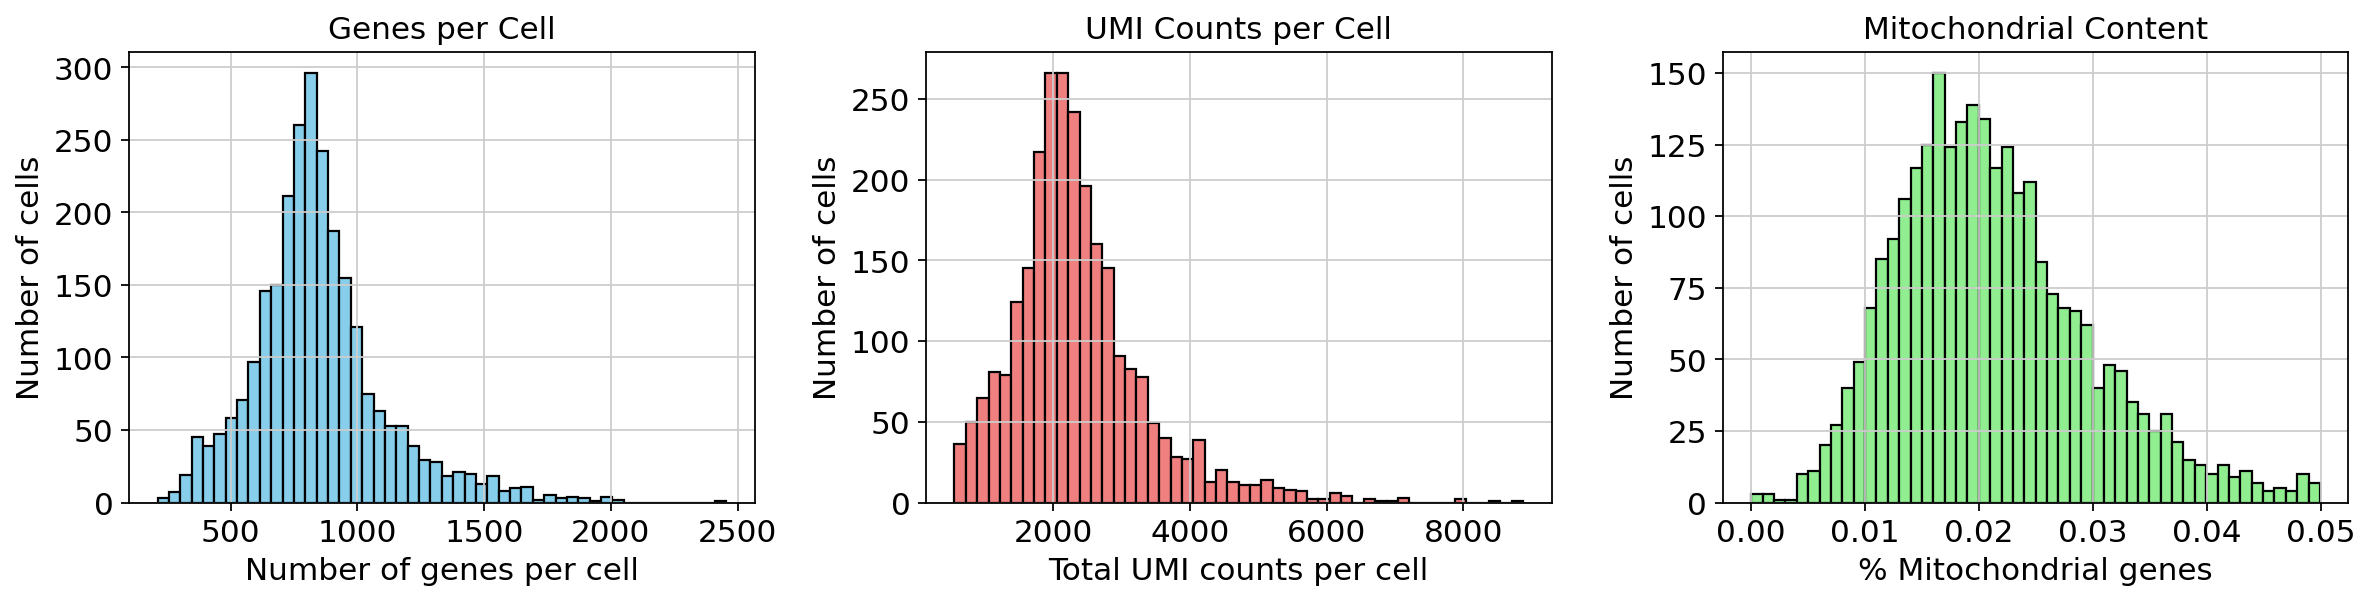

Summary statistics:
           n_genes     n_counts  percent_mito
count  2638.000000  2638.000000   2638.000000
mean    850.086808  2371.069092      0.021166
std     263.373564   990.158142      0.008431
min     212.000000   556.000000      0.000000
25%     700.000000  1779.250000      0.015203
50%     820.000000  2213.000000      0.020107
75%     955.750000  2766.750000      0.025911
max    2455.000000  8875.000000      0.049938


In [ ]:
# Quality control metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Genes per cell
axes[0].hist(adata.obs['n_genes'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of genes per cell')
axes[0].set_ylabel('Number of cells')
axes[0].set_title('Genes per Cell')

# UMI counts per cell
axes[1].hist(adata.obs['n_counts'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Total UMI counts per cell')
axes[1].set_ylabel('Number of cells')
axes[1].set_title('UMI Counts per Cell')

# Percent mitochondrial
axes[2].hist(adata.obs['percent_mito'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_xlabel('% Mitochondrial genes')
axes[2].set_ylabel('Number of cells')
axes[2].set_title('Mitochondrial Content')

plt.tight_layout()
plt.show()

print("Summary statistics:")
print(adata.obs[['n_genes', 'n_counts', 'percent_mito']].describe())

### Understanding QC Metrics:
- **n_genes**: How many genes detected per cell (good cells: 500-5000)
- **n_counts**: Total UMI counts (unique molecular identifiers)
- **percent_mito**: % of reads from mitochondrial genes (high = dying cell)

### AI CHALLENGE #1:
Ask your AI assistant: *"Why do we filter cells with high mitochondrial content in single-cell RNA-seq?"*

---

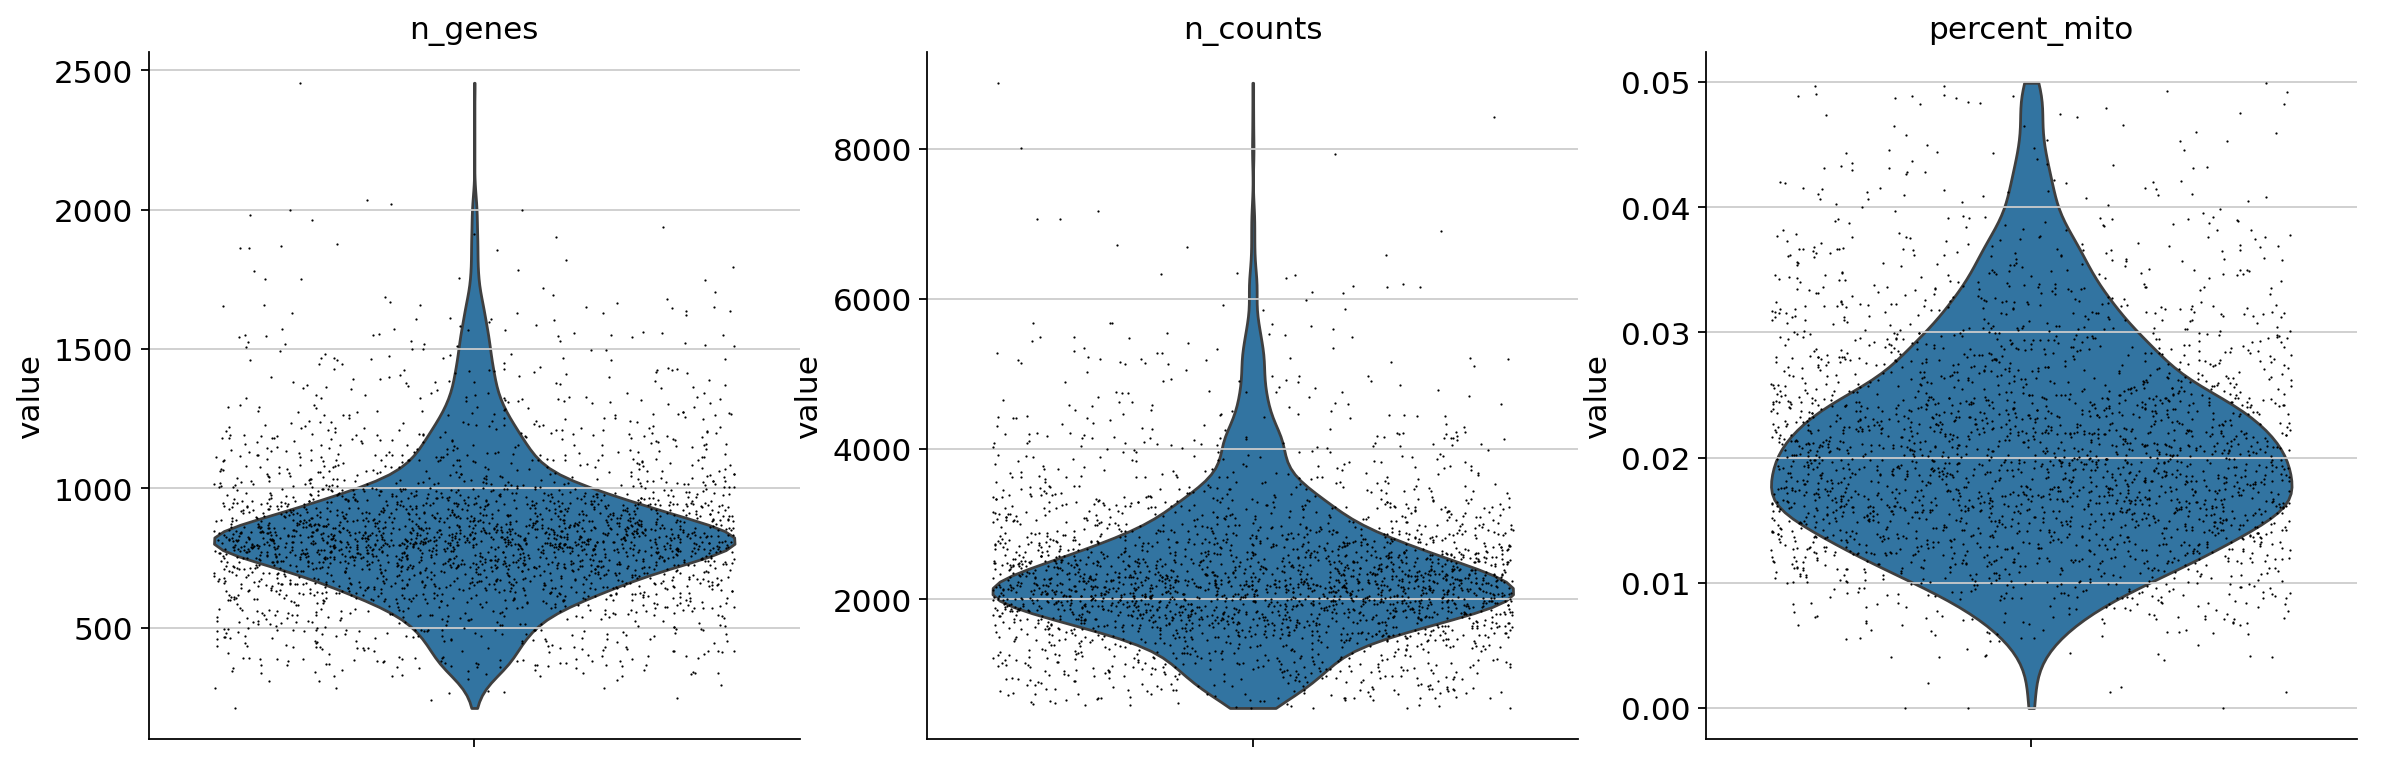

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

## Part 5: Principal Component Analysis (PCA)

### Understanding PCA: The Intuition

**The Challenge:** We have ~1,800 genes per cell = 1,800 dimensions!

**Visual analogy:** Imagine a 3D sculpture:
- You can't capture it in one photo
- But 2-3 photos from different angles give you a good sense of it
- PCA finds the "best angles" to view your data

**What PCA does:**
1. Finds the direction where cells vary the most → **PC1**
2. Finds the next direction (perpendicular) with most variation → **PC2**  
3. Continues for PC3, PC4, ... PC50

**Key insight:** Most biological variation is captured in the first 20-50 PCs. The rest is mostly noise!

---

### Why Do We Need PCA?

**The Curse of Dimensionality:**

In high dimensions (1,800 genes), strange things happen:
- All points become roughly equidistant
- "Nearest neighbors" aren't actually nearby
- Clustering algorithms fail
- Computation becomes impossibly slow

**PCA solves this by:**
- Reducing 1,800 dimensions → 50 meaningful dimensions
- Removing technical noise (which appears in later PCs)
- Preserving biological signal (in early PCs)
- Making downstream analysis tractable

---

### 🔬 Biological Interpretation of PCs

Each PC is a weighted combination of all genes:

**PC1** typically represents:
- Major cell type differences (e.g., T cells vs monocytes)
- Or major biological processes (e.g., cell cycle)
- Usually captures 5-20% of total variance

**PC2-PC5** capture:
- Subtypes within major populations
- Secondary biological processes
- Each captures progressively less variance

**PC20-PC50** capture:
- Fine-grained biological differences
- Mixed with increasing technical noise

**PC50+** are mostly:
- Technical variation
- Random noise
- Usually discarded

---

Let's compute PCA and see how much variance each PC explains!

### Visual Demo: How PCA Works

Let's create a simple 2D example to see PCA in action:

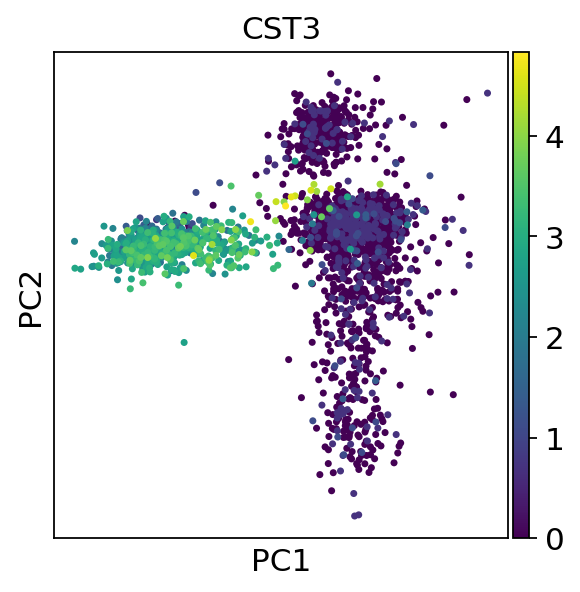

In [4]:
# Plot cells in first 2 principal components
sc.pl.pca(adata, color='CST3', size=40)

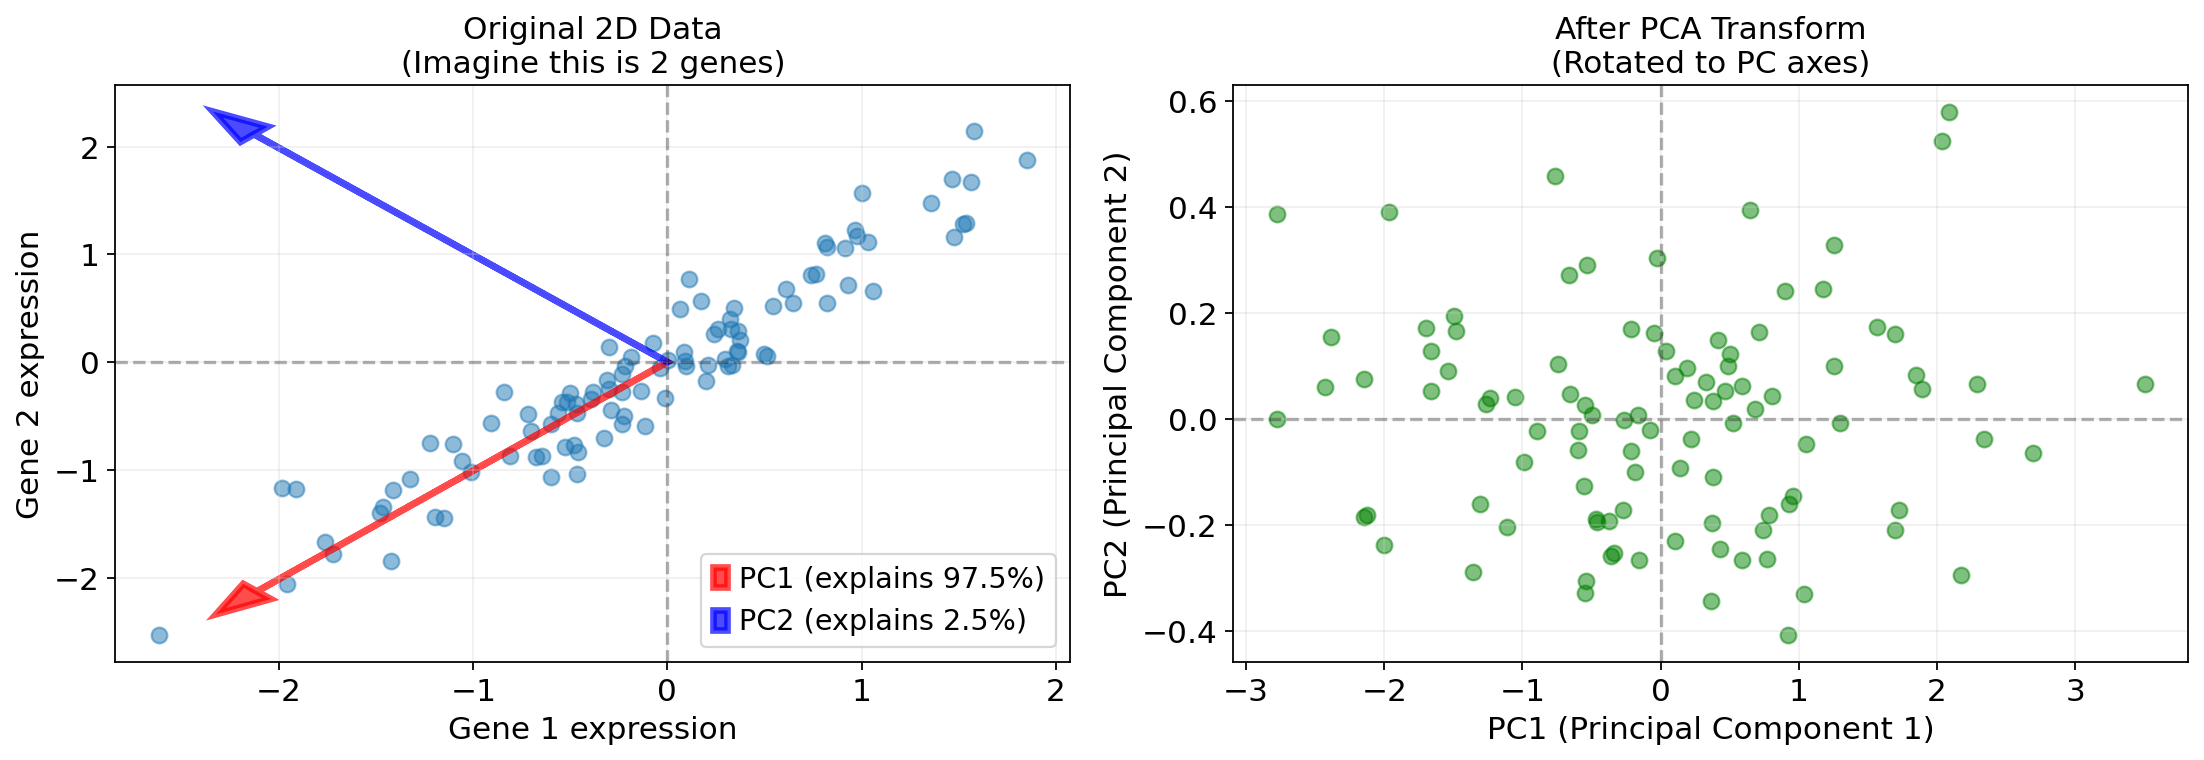

  PCA found:
  PC1 explains 97.5% of variance (red arrow)
  PC2 explains 2.5% of variance (blue arrow)
  Key insight: PC1 captures the main direction of variation!
  In the right plot, data is spread along PC1, compressed along PC2.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create simple 2D data (correlated)
np.random.seed(42)
x = np.random.randn(100)
y = x + np.random.randn(100) * 0.3 # y correlated with x

# Compute PCA manually
data = np.column_stack([x, y])
data_centered = data - data.mean(axis=0)
cov_matrix = np.cov(data_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original data
axes[0].scatter(x, y, alpha=0.5, s=50)
axes[0].set_xlabel('Gene 1 expression')
axes[0].set_ylabel('Gene 2 expression')
axes[0].set_title('Original 2D Data\n(Imagine this is 2 genes)')
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].grid(True, alpha=0.3)

# Draw PC directions
for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    axes[0].arrow(0, 0, eigenvec[0]*3, eigenvec[1]*3,
                  head_width=0.2, head_length=0.3,
                  fc=['red', 'blue'][i], ec=['red', 'blue'][i],
                  linewidth=3, alpha=0.7,
                  label=f'PC{i+1} (explains {eigenval/eigenvalues.sum()*100:.1f}%)')
axes[0].legend()

# PCA-transformed data
data_pca = data_centered @ eigenvectors
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, s=50, c='green')
axes[1].set_xlabel('PC1 (Principal Component 1)')
axes[1].set_ylabel('PC2 (Principal Component 2)')
axes[1].set_title('After PCA Transform\n(Rotated to PC axes)')
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"  PCA found:")
print(f"  PC1 explains {eigenvalues[0]/eigenvalues.sum()*100:.1f}% of variance (red arrow)")
print(f"  PC2 explains {eigenvalues[1]/eigenvalues.sum()*100:.1f}% of variance (blue arrow)")
print(f"  Key insight: PC1 captures the main direction of variation!")
print(f"  In the right plot, data is spread along PC1, compressed along PC2.")

### What This Demo Shows

**Left plot (original data):**
- Red arrow = PC1 direction (maximum variance)
- Blue arrow = PC2 direction (perpendicular, remaining variance)
- PCA finds these directions automatically!

**Right plot (after PCA):**
- Data is rotated so PC1 is horizontal, PC2 is vertical
- Most spread is along PC1 (the important axis)
- Less spread along PC2

**For single-cell data:**
- Same idea, but with 1,800 dimensions instead of 2!
- PC1 might be "T cells vs monocytes"
- PC2 might be "activated vs resting"
- Etc.

---

Computing PCA...
PCA complete!


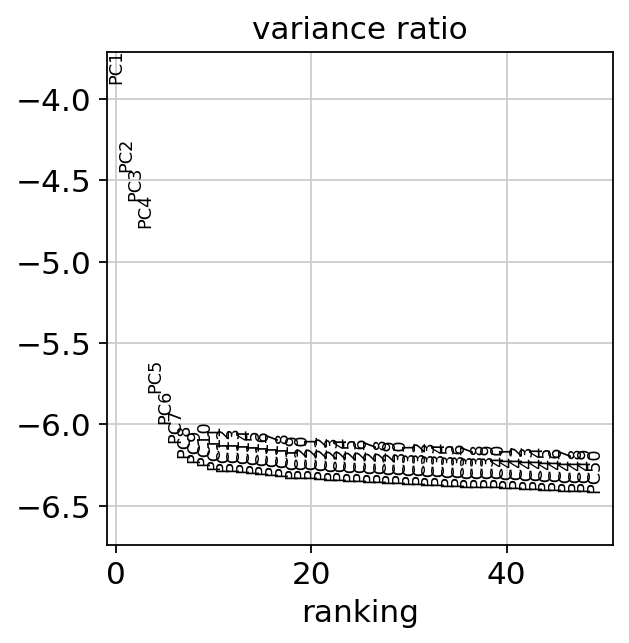

In [6]:
# Compute PCA
print("Computing PCA...")
sc.tl.pca(adata, svd_solver='arpack')
print("PCA complete!")

# How much variance does each PC explain?
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

### Interpreting the Variance Plot

**What you're seeing:**
- X-axis: Principal Component number (PC1, PC2, PC3, ...)
- Y-axis: Percentage of variance explained by that PC

**What to look for:**

1. **The "Elbow":**
   - Where the curve starts to flatten
   - This is roughly where biology ends and noise begins
   - For scRNA-seq, often around PC 20-50

2. **Cumulative variance:**
   - First 10 PCs typically capture ~50% of variance
   - First 30 PCs typically capture ~70-80% of variance
   - First 50 PCs typically capture ~80-90% of variance

3. **What does this mean?**
   - You've compressed 1,800 dimensions into 50
   - You've kept 80-90% of the information
   - You've thrown out 10-20% (mostly noise)

**Rule of thumb for choosing # of PCs:**
- **Conservative:** Use PCs until cumulative variance ≥ 80%
- **Standard:** Use 30-50 PCs (works for most datasets)
- **Aggressive:** Use only up to elbow (might miss subtle biology)

**For this workshop:** We'll use 40 PCs (a good middle ground)

---

### Interpreting the Variance Plot:
- **Elbow point**: Where the curve starts to flatten
- **First ~20-40 PCs** capture most biological variation
- Later PCs often just capture noise

### Question: How many PCs would you choose for downstream analysis?

Let's visualize cells in PCA space:

### About CST3:
**CST3 (Cystatin C)** is a marker for **monocytes and dendritic cells**.

Notice how cells with high CST3 (yellow) cluster together? This suggests PCA is capturing biological signal!

### YOUR TURN:
Try visualizing with different genes. Here are some markers:
- **CD3D** or **CD3E**: T cells
- **MS4A1** (CD20): B cells  
- **NKG7**: NK cells
- **CD14**: Monocytes

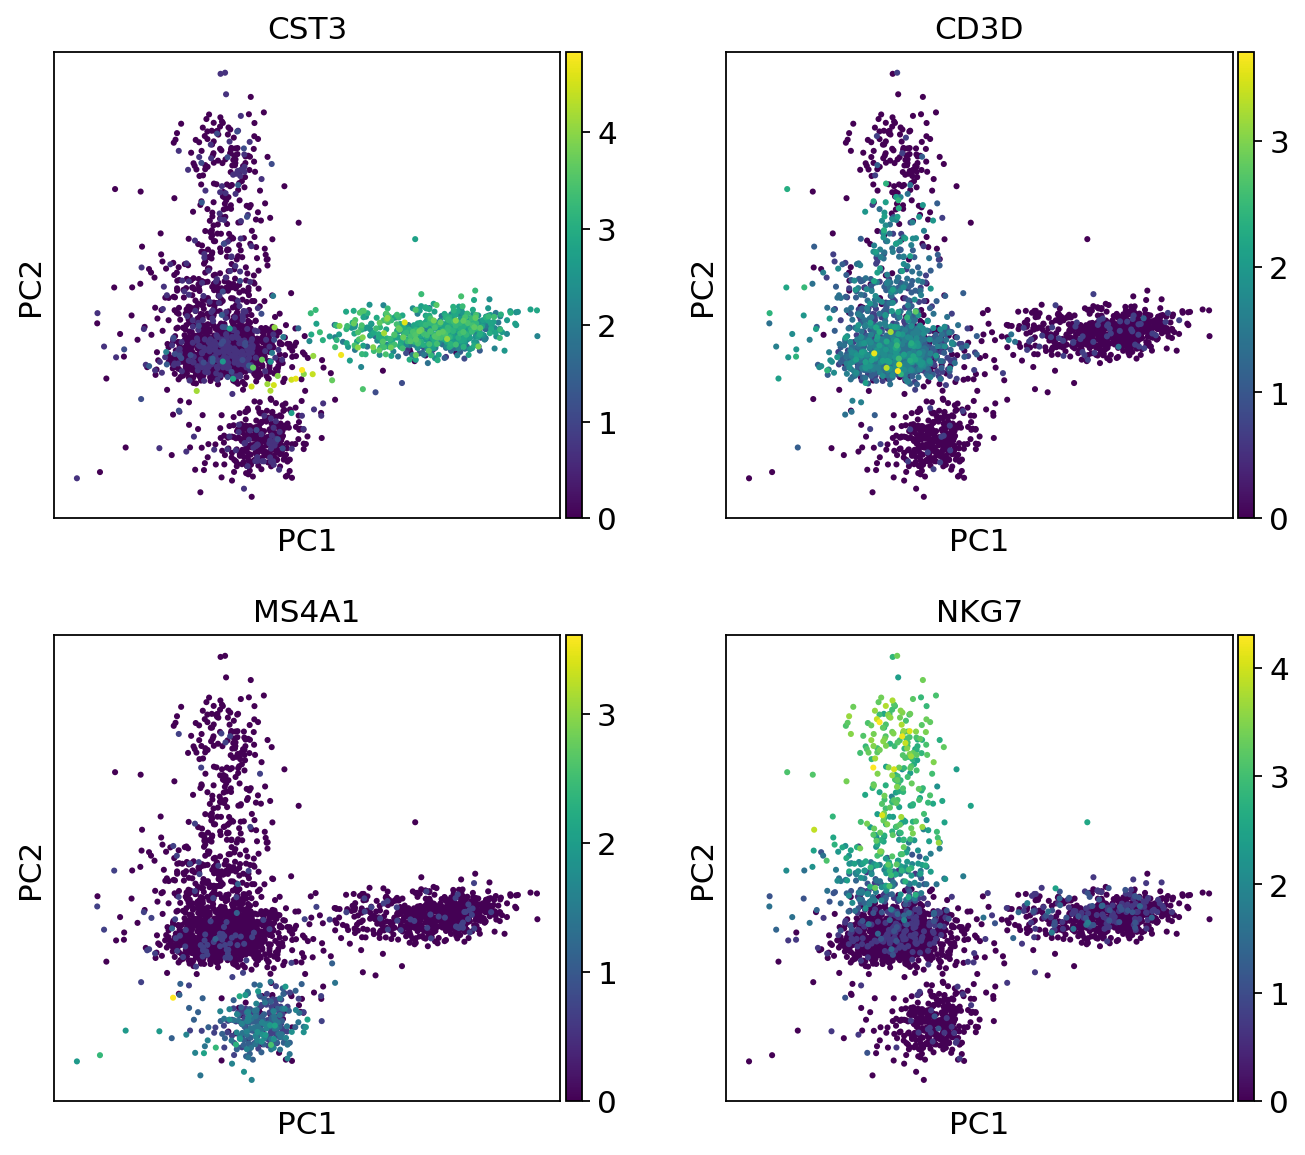

In [ ]:
# YOUR CODE HERE: Try different genes
# Example:
# sc.pl.pca(adata, color='CD3D', size=40)

# Visualize multiple genes at once
sc.pl.pca(adata, color=['CST3', 'CD3D', 'MS4A1', 'NKG7'], size=30, ncols=2)

### AI CHALLENGE #2:
Ask your AI assistant: *"What is the difference between PCA and t-SNE for visualizing single-cell data?"*

---

## Part 6: UMAP - Better Visualization

### What is UMAP?

**UMAP = Uniform Manifold Approximation and Projection**

**The problem with PCA:**
- PCA is **linear**: It can only find straight-line patterns
- Real biology is often **nonlinear** (curved, twisted patterns)
- PCA in 2D often shows overlapping clouds

**UMAP is better because:**
- It's **nonlinear**: Can untangle complex patterns
- It preserves **local structure**: Similar cells stay together
- It reveals **clusters**: Cell populations become visible

---

### PCA vs UMAP: The Key Difference

**PCA:**
- Like projecting a 3D shadow onto a 2D wall
- Linear transformation
- Preserves **global distances**
- Good for understanding major axes of variation

**UMAP:**
- Like carefully arranging photos to show relationships
- Nonlinear transformation  
- Preserves **local neighborhoods**
- Good for revealing clusters and subtypes

**Analogy:**
- PCA = A map of the whole country (shows big distances)
- UMAP = A neighborhood map (shows which houses are near each other)

---

### Understanding UMAP Parameters

UMAP has two critical parameters that control the visualization:

#### 1. **n_neighbors** (default: 15)

**What it controls:** How many neighbors UMAP considers when placing each cell

**Low n_neighbors (5-10):**
- ➕ Emphasizes local structure
- ➕ Reveals fine-grained clusters
- ➕ Good for finding rare cell types
- ➖ Can be noisy/fragmented
- ➖ May over-split real populations

**High n_neighbors (30-50):**
- ➕ Emphasizes global structure
- ➕ More stable/reproducible
- ➕ Better for major cell types
- ➖ May merge distinct populations
- ➖ Can miss subtle differences

**Think of it as:**
- Low n_neighbors = Looking at your immediate neighbors (local gossip)
- High n_neighbors = Looking at your whole neighborhood (city planning)

#### 2. **min_dist** (default: 0.5, not shown today)

Controls how tightly UMAP packs points together:
- Low (0.1): Points packed tightly, clear clusters
- High (0.9): Points spread out, relationships less clear

---

### UMAP Warnings: What You Should Know

**1. Distances in UMAP are NOT meaningful**
   - Two clusters far apart in UMAP might be biologically similar
   - Two clusters close together might be very different
   - Only **neighborhoods** matter, not global distances

**2. UMAP can change dramatically with parameters**
   - Same data, different n_neighbors → totally different plots
   - Always try multiple parameter settings
   - Don't over-interpret exact positioning

**3. UMAP is stochastic**
   - Contains randomness (even with fixed seed)
   - Running twice can give slightly different layouts
   - Clusters should be consistent, exact positions won't be

**4. UMAP emphasizes clusters (sometimes too much)**
   - Can make continua look like discrete clusters
   - If you see a gradient in PCA but clusters in UMAP, be suspicious!
   - Might be artificially separating a continuous process

**Best practice:** Use UMAP for visualization, but validate clusters with other methods!

---

Let's compute UMAP and then explore how n_neighbors affects the result!

In [7]:
# Compute neighborhood graph
print("Computing neighborhood graph...")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
print("Neighbors computed!")

# Compute UMAP embedding
print("Computing UMAP...")
sc.tl.umap(adata)
print("UMAP complete!")

Computing neighborhood graph...
Neighbors computed!
Computing UMAP...
UMAP complete!


In [11]:
adata.var_names

Index(['TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1', 'TNFRSF25', 'TNFRSF9',
       'CTNNBIP1', 'SRM', 'UBIAD1',
       ...
       'DSCR3', 'BRWD1', 'BACE2', 'SIK1', 'C21orf33', 'ICOSLG', 'SUMO3',
       'SLC19A1', 'S100B', 'PRMT2'],
      dtype='object', name='index', length=1838)

### Visualize UMAP with Cell Type Markers

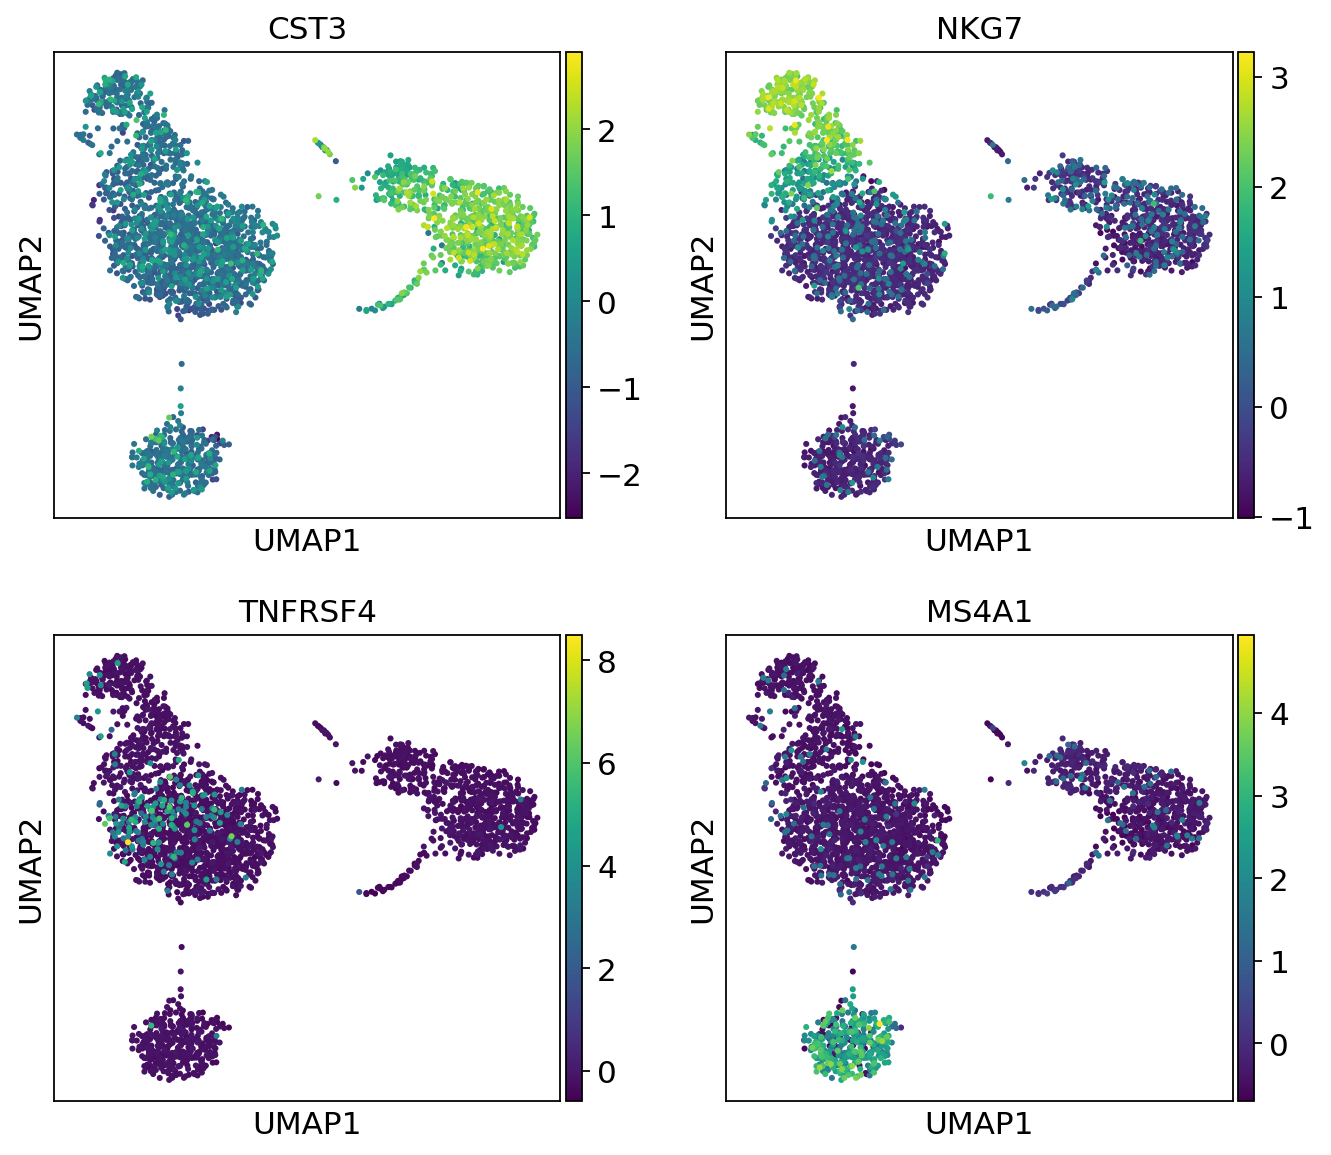

In [12]:
# UMAP colored by gene expression
sc.pl.umap(adata, color=['CST3', 'NKG7', 'TNFRSF4', 'MS4A1'],
           ncols=2, size=30, use_raw=False)

### INTERACTIVE EXPERIMENT: n_neighbors

Let's see how `n_neighbors` changes the UMAP visualization!

**Your task:** Run the cell below multiple times with different values:
1. First try `n_neighbors = 5` (very local)
2. Then try `n_neighbors = 15` (default)
3. Finally try `n_neighbors = 50` (very global)

**What to observe:**
- How does the overall structure change?
- Are there more or fewer apparent clusters?
- Does one setting reveal structure the others don't?

**Think about:** Which setting best matches your biological question?

Computing UMAP with n_neighbors=15...


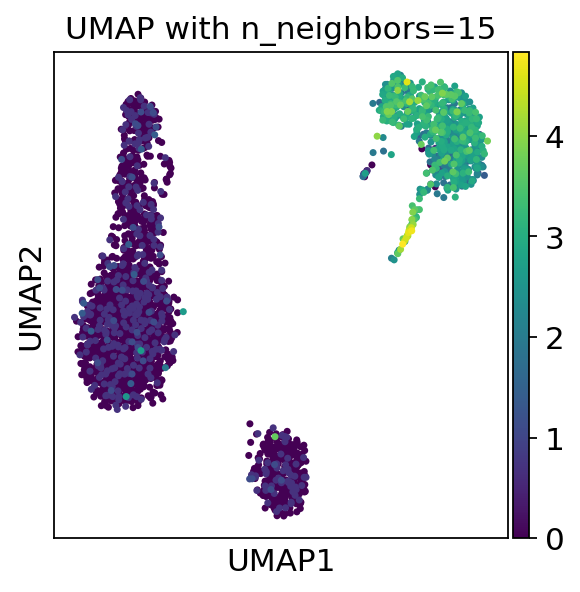

Done! Now try a different value.


In [17]:
# EXPERIMENT: Change this value and re-run!
n_neighbors_to_try = 15  # Try: 5, 10, 15, 30, 50

print(f"Computing UMAP with n_neighbors={n_neighbors_to_try}...")

# Compute neighbors and UMAP with your chosen parameter
sc.pp.neighbors(adata, n_neighbors=n_neighbors_to_try, n_pcs=40)
sc.tl.umap(adata)

# Visualize
sc.pl.umap(adata, color='CST3', size=40,
           title=f'UMAP with n_neighbors={n_neighbors_to_try}')

print(f"Done! Now try a different value.")

### Discussion: What Did You Notice?

**With n_neighbors=5 (local):**
- Did you see more fragmentation?
- Were there many small islands?
- Could you see fine structure within major groups?

**With n_neighbors=50 (global):**
- Did clusters merge together?
- Was the structure smoother/more connected?
- Did you lose some of the fine detail?

**The key lesson:**
There's no single "correct" UMAP. Different parameters reveal different aspects of your data.
For downstream analysis, try multiple values to ensure your conclusions are robust!

**For the rest of the workshop**, let's use n_neighbors=10 (good balance):

In [18]:
# Set final parameters for downstream analysis
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
print("UMAP computed with n_neighbors=10")

UMAP computed with n_neighbors=10


### Parameter Effects:
- **Low n_neighbors (5)**: More detailed structure, but can be noisy
- **High n_neighbors (30)**: Smoother, but may merge distinct populations
- **Default (10-15)**: Usually a good balance

### AI CHALLENGE #3:
Ask your AI: *"How does the n_neighbors parameter affect UMAP in single-cell analysis?"*

---

## Part 7: Clustering - Finding Cell Populations

### 🎯 What is Clustering?

**Goal:** Automatically group similar cells together without predefined labels

**The challenge:**
- We have ~3,000 cells
- Each cell is a point in 40-dimensional space (our PCs)
- We want to find groups of cells that are "close together"

**What makes cells similar?**
- Similar gene expression patterns
- Same biological state (cell type, activation state, etc.)
- In our PCA space: nearby points

---

### 🔬 Leiden Algorithm: How It Works

We use the **Leiden algorithm** (improvement over Louvain). Here's the intuition:

**Step 1: Build a graph**
- Each cell is a node
- Draw edges between similar cells (k-nearest neighbors)
- Think: social network where edges = similarity

**Step 2: Find communities**
- Look for groups with many internal connections
- Few connections between groups
- Like finding friend groups in a social network

**Step 3: Optimize**
- Try moving cells between groups
- Keep changes that improve "modularity" (within-group connections)
- Stop when no improvement possible

**Why Leiden (not K-means)?**
- K-means assumes spherical clusters (rare in biology)
- Leiden works on the graph (more flexible)
- Leiden finds the "right" number of clusters automatically
- Leiden is faster and more accurate than older methods

---

### ⚙️ The Resolution Parameter: Your Main Dial

The **resolution** parameter controls how many clusters you get:

**Low resolution (0.1 - 0.3):**
- Fewer, larger clusters
- Major cell types only
- Example: "All T cells" as one cluster
- Risk: Missing important subtypes

**Medium resolution (0.4 - 0.8):**
- Balanced clustering
- Cell types and some subtypes
- Example: "CD4+ T cells" and "CD8+ T cells" separate
- **Default and usually good choice**

**High resolution (1.0 - 2.0):**
- Many small clusters
- Subtypes and substates
- Example: "Naive CD4+", "Memory CD4+", "Regulatory CD4+"
- Risk: Over-splitting biological populations

**Very high resolution (>2.0):**
- Extreme fragmentation
- May split single cell types into multiple clusters
- Usually too granular

---

### 📊 How to Choose Resolution?

**Guidelines:**

1. **Start with default (0.5)**
   - See what you get
   - This works for most datasets

2. **Look at the UMAP**
   - Do visual clusters match algorithmic clusters?
   - If a visual cluster is split → increase resolution
   - If two visual clusters are merged → decrease resolution

3. **Check marker genes**
   - Do clusters have distinct marker genes?
   - If clusters share the same markers → might be over-clustered
   - If clusters have very different functions → good!

4. **Consider your question**
   - Comparing major cell types → low resolution
   - Finding rare populations → high resolution
   - Exploratory analysis → try multiple resolutions!

**Pro tip:** There's no single "correct" resolution. Different resolutions answer different questions!

---

### ✅ Validating Your Clusters

**Good clusters should:**
1. **Be visually separated** in UMAP (mostly)
2. **Have distinct marker genes** (we'll find these next)
3. **Make biological sense** (represent known cell types/states)
4. **Be reproducible** (stable across parameter changes)

**Warning signs of bad clustering:**
- Clusters with identical marker genes (over-split)
- Mixing very different cell types (under-split)
- Highly dependent on small parameter changes (unstable)
- Doesn't match biological knowledge

**Remember:** Clustering is a tool for exploration, not truth. Always validate with biology!

---

Let's perform clustering and then we'll explore how resolution affects the results!

Performing Leiden clustering...


/tmp/ipython-input-2652973298.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


Clustering complete!
Found 6 clusters


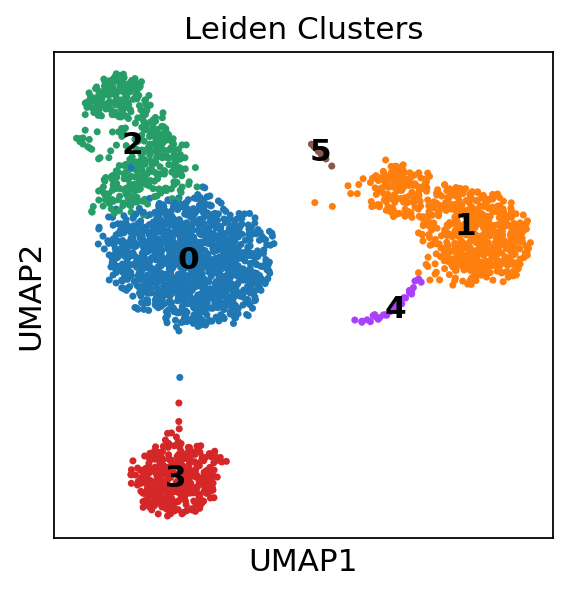

In [19]:
# Perform Leiden clustering
print("Performing Leiden clustering...")
sc.tl.leiden(adata, resolution=0.5)
print("Clustering complete!")

# How many clusters did we find?
n_clusters = len(adata.obs['leiden'].unique())
print(f"Found {n_clusters} clusters")

# Visualize clusters
sc.pl.umap(adata, color=['leiden'], legend_loc='on data',
           title='Leiden Clusters', size=40)

---

### INTERACTIVE EXPERIMENT: Resolution Parameter

The **resolution** parameter is like a zoom dial:
- Low resolution = zoomed out (major cell types)
- High resolution = zoomed in (subtypes and states)

**Let's try different resolutions and see what happens!**

Run the cell below with different resolution values:

Clustering with resolution=0.1...
Found 4 clusters


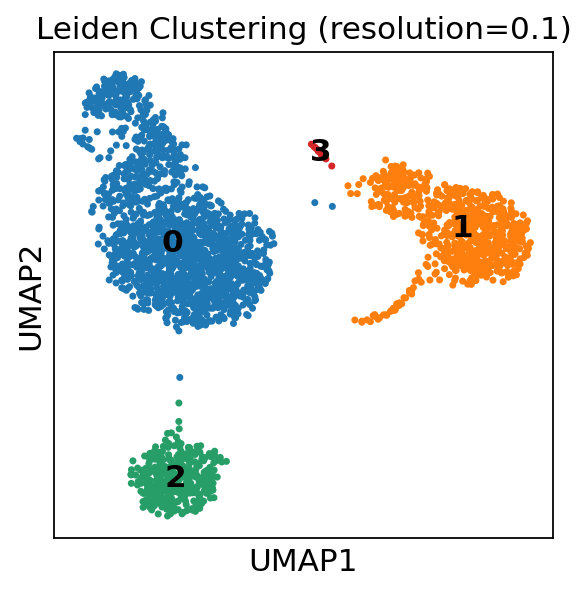

Try running again with a different resolution!


In [23]:
# EXPERIMENT: Try different resolution values!
resolution_to_try = 0.1  # Try: 0.2, 0.5, 1.0, 1.5, 2.0

print(f"Clustering with resolution={resolution_to_try}...")

# Run Leiden clustering with your chosen resolution
sc.tl.leiden(adata, resolution=resolution_to_try, key_added=f'leiden_r{resolution_to_try}')

# Count clusters
n_clusters = len(adata.obs[f'leiden_r{resolution_to_try}'].unique())
print(f"Found {n_clusters} clusters")

# Visualize
sc.pl.umap(adata, color=f'leiden_r{resolution_to_try}',
           legend_loc='on data',
           title=f'Leiden Clustering (resolution={resolution_to_try})',
           size=40)

print(f"Try running again with a different resolution!")

### Resolution Comparison

Let's visualize multiple resolutions side-by-side to see the effect:

<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-3922674697.py:24: SyntaxWarning: invalid escape sequence '\S'
  print("\Summary of Clusters by Resolution:")


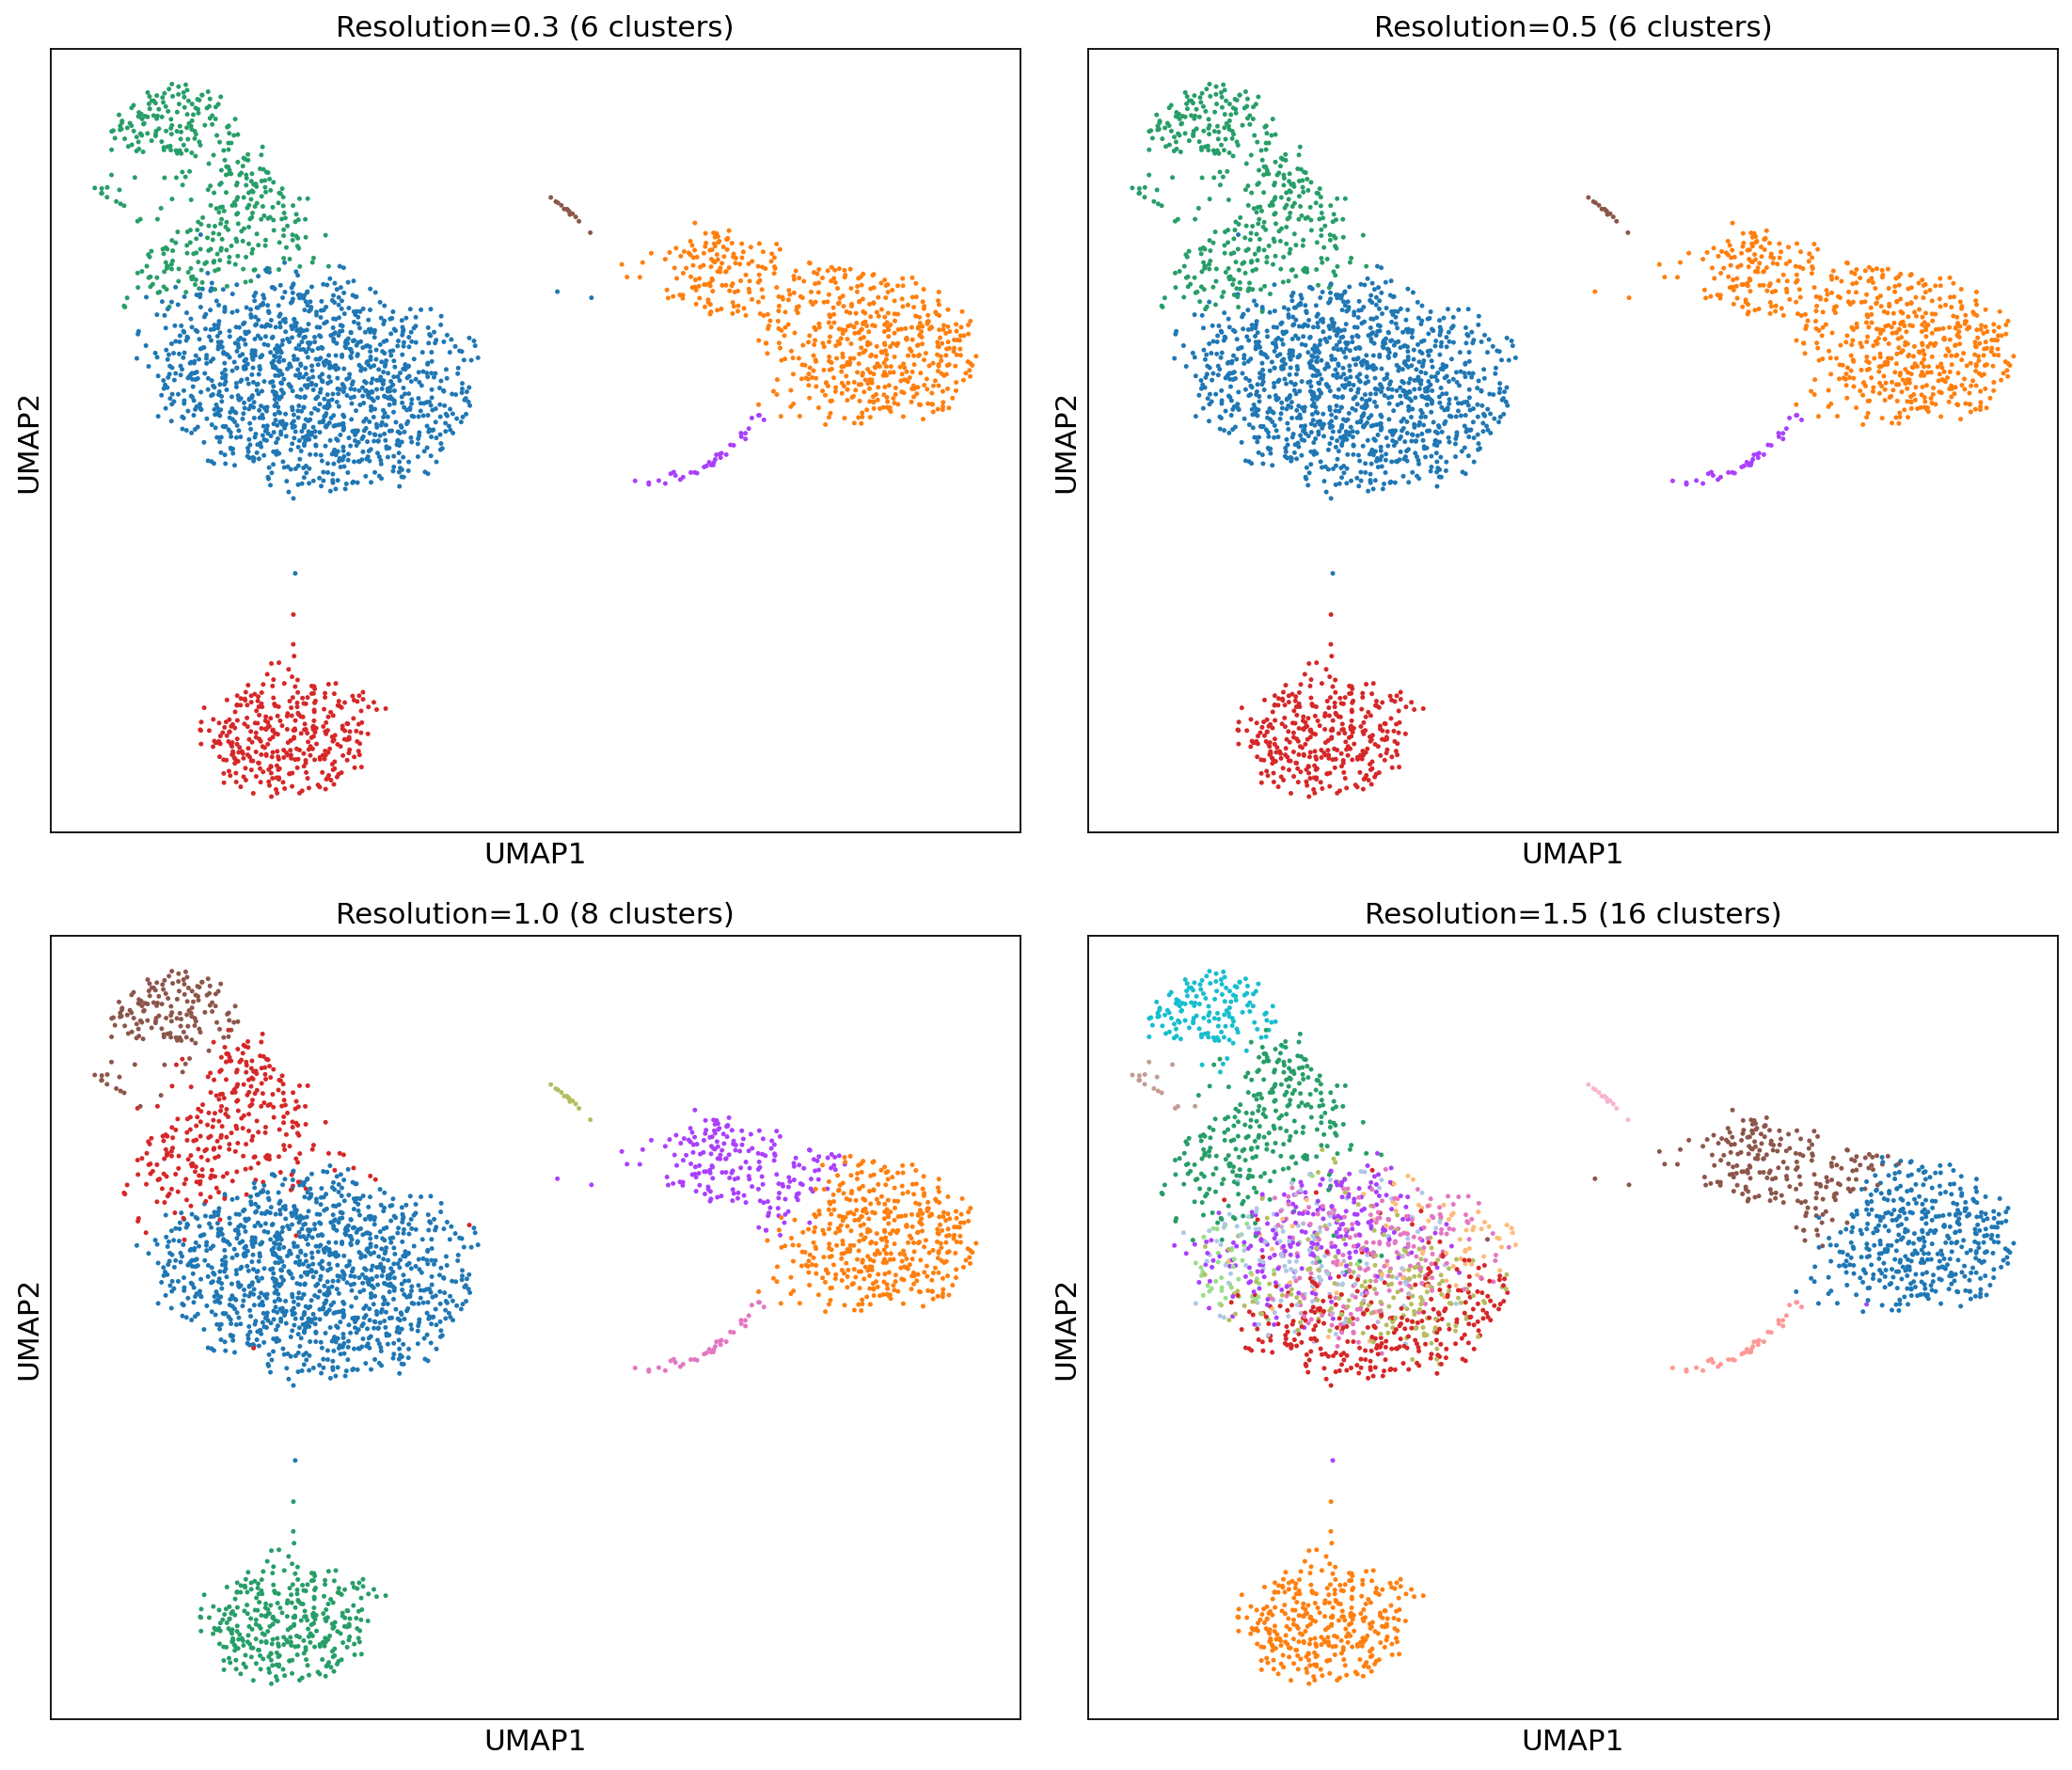

\Summary of Clusters by Resolution:
----------------------------------------
Resolution  0.3 →  6 clusters
Resolution  0.5 →  6 clusters
Resolution  1.0 →  8 clusters
Resolution  1.5 → 16 clusters


In [25]:
# Compare three different resolutions
import matplotlib.pyplot as plt

resolutions = [0.3, 0.5, 1.0, 1.5]

# Compute clustering at each resolution
for res in resolutions:
    sc.tl.leiden(adata, resolution=res, key_added=f'leiden_{res}')

# Plot all four
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, res in enumerate(resolutions):
    n_clusters = len(adata.obs[f'leiden_{res}'].unique())
    sc.pl.umap(adata, color=f'leiden_{res}', ax=axes[i], show=False,
               title=f'Resolution={res} ({n_clusters} clusters)',
               legend_loc='none', size=20)

plt.tight_layout()
plt.show()

# Print summary
print("\Summary of Clusters by Resolution:")
print("-" * 40)
for res in resolutions:
    n_clusters = len(adata.obs[f'leiden_{res}'].unique())
    print(f"Resolution {res:4.1f} → {n_clusters:2d} clusters")

### What Resolution Should You Use?

**Look at the plots above and ask:**

1. **Resolution 0.3:**
   - How many clusters? (Should be 5-7)
   - These are the **major cell types**
   - Good for: Broad comparisons, initial exploration

2. **Resolution 0.5 (default):**
   - How many clusters? (Should be 8-10)
   - Balance between **types and subtypes**
   - Good for: Most analyses, balanced view

3. **Resolution 1.0:**
   - How many clusters? (Should be 12-15)
   - Revealing **subtypes within cell types**
   - Good for: Finding rare populations, detailed analysis

4. **Resolution 1.5:**
   - How many clusters? (Should be 15-20)
   - Very **granular separation**
   - Good for: Fine cell states, but may over-split

**Key insight:** Higher resolution doesn't mean "better" - it means "more granular".
Choose based on your biological question!

**For this workshop**, let's use resolution=0.5 for downstream analysis:

In [26]:
# Use resolution 0.5 for the rest of the analysis
sc.tl.leiden(adata, resolution=0.5)
n_clusters = len(adata.obs['leiden'].unique())
print(f"Using {n_clusters} clusters (resolution=0.5) for downstream analysis")

Using 6 clusters (resolution=0.5) for downstream analysis


### Compare with Gene Expression:
Let's see if our clusters match known cell type markers.

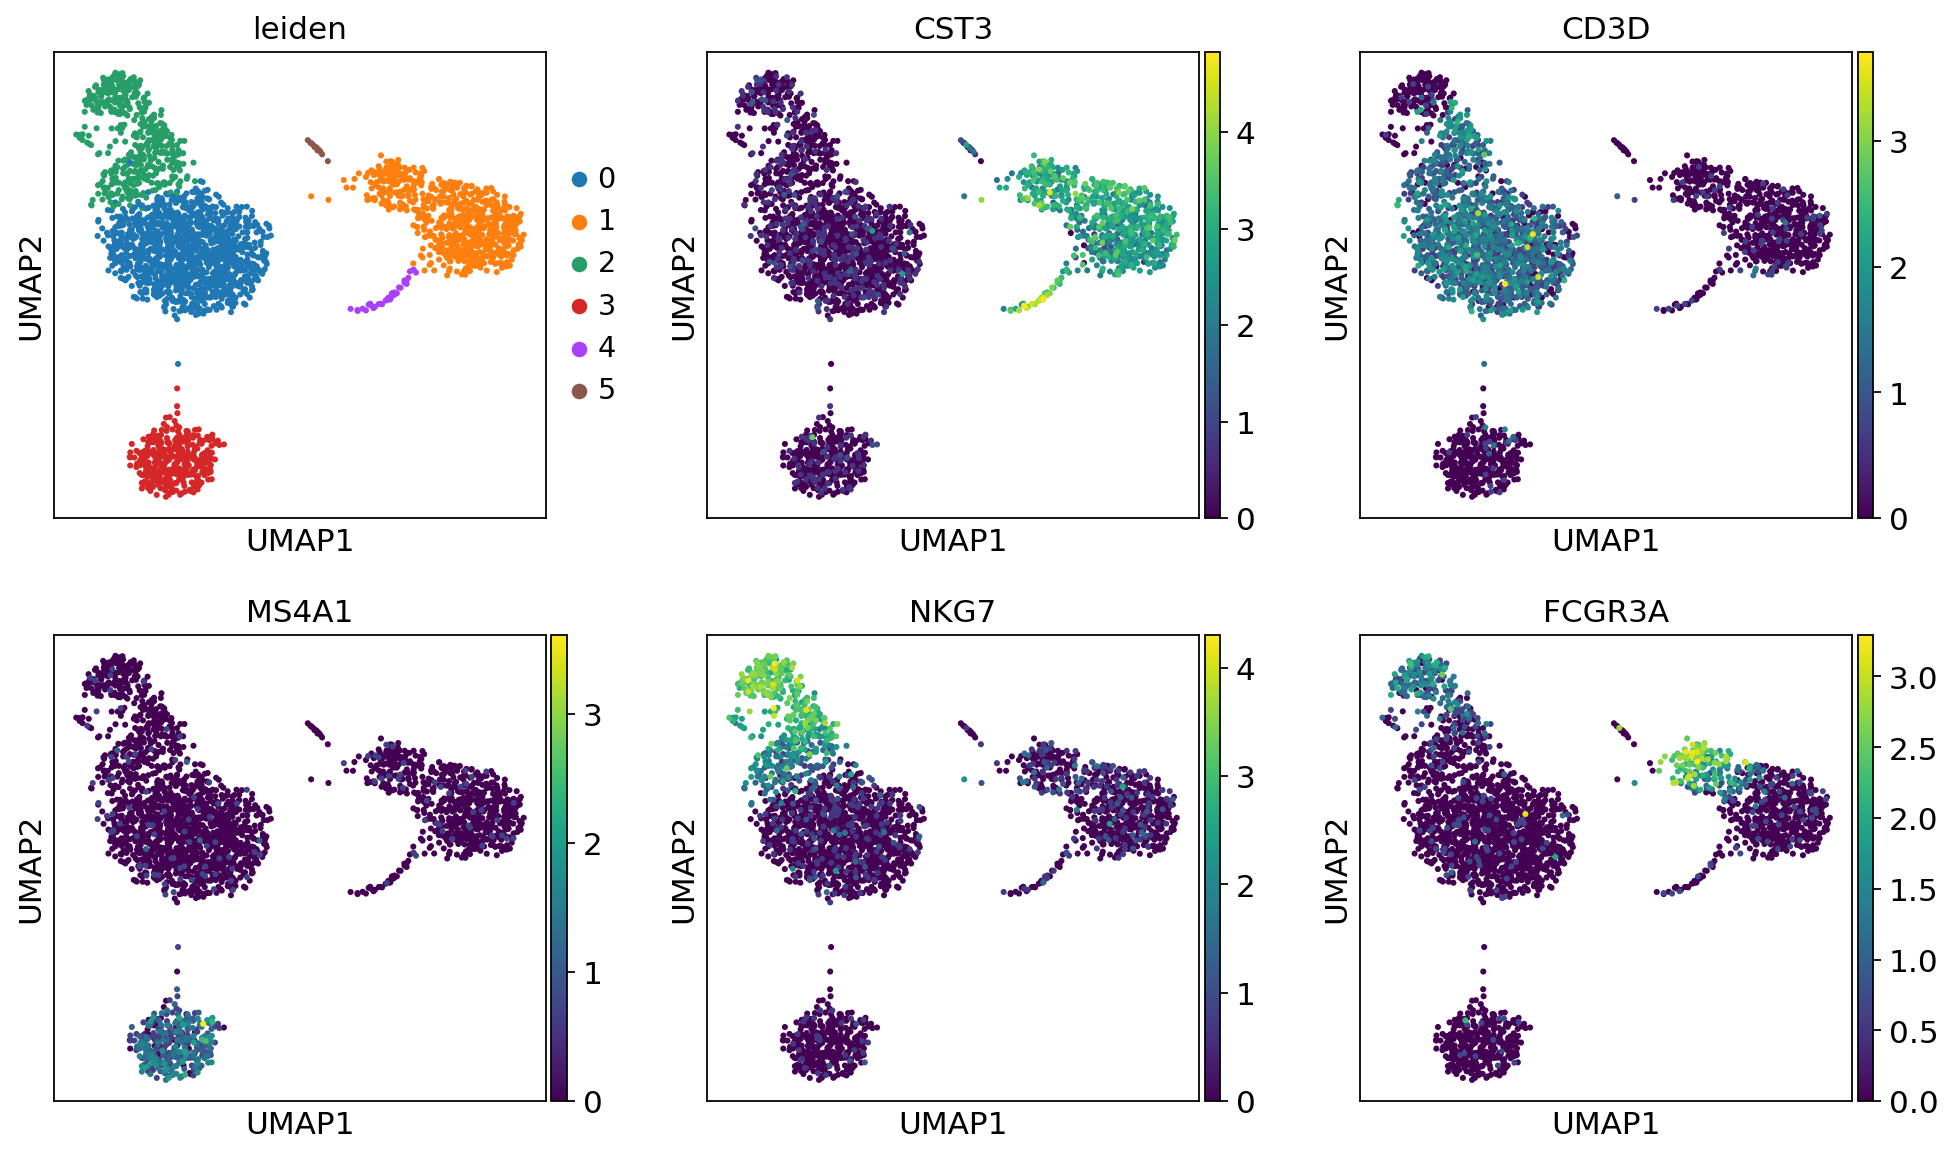

In [27]:
# Side-by-side: clusters vs markers
sc.pl.umap(adata, color=['leiden', 'CST3', 'CD3D', 'MS4A1', 'NKG7', 'FCGR3A'],
           ncols=3, size=30)

### Quick Cell Type Guide:
- **CST3**: Monocytes
- **CD3D**: T cells  
- **MS4A1**: B cells
- **NKG7**: NK cells
- **FCGR3A**: CD16+ monocytes

### Discussion: Do the clusters align with marker expression?

---

---

## Parameter Cheat Sheet

Before we move on, here's a quick reference for all the parameters we've explored:

### PCA Parameters

| Parameter | What it controls | Typical values | How to choose |
|-----------|------------------|----------------|---------------|
| `n_pcs` | Number of PCs to compute | 50 | More = slower but more complete |
| `n_pcs` (for downstream) | Number of PCs to use | 30-50 | Use until elbow in variance plot |

### UMAP Parameters

| Parameter | What it controls | Typical values | Effects |
|-----------|------------------|----------------|----------|
| `n_neighbors` | Local vs global structure | 5-50 | **Low (5-10)**: See fine structure, more fragmented<br>**High (30-50)**: Smooth, may merge populations |
| `min_dist` | How tight clusters are | 0.1-0.9 | **Low**: Tight clusters<br>**High**: Spread out |
| `n_pcs` | Input dimensionality | 30-50 | Should match PCA choice |

### Clustering Parameters

| Parameter | What it controls | Typical values | Effects |
|-----------|------------------|----------------|----------|
| `resolution` | Granularity of clustering | 0.1-2.0 | **Low (0.2-0.4)**: Major cell types (5-8 clusters)<br>**Medium (0.5-0.8)**: Types + subtypes (8-15 clusters)<br>**High (1.0-2.0)**: Very granular (15-30 clusters) |

### General Principles

1. **No single "correct" parameter set** - different values answer different questions
2. **Try multiple values** to ensure conclusions are robust
3. **Biological validation is key** - parameters don't determine truth
4. **Start with defaults** and adjust based on what you see
5. **Document your choices** for reproducibility

### Quick Decision Tree

**Looking for major cell types?**
→ n_neighbors=30, resolution=0.3

**Balanced exploration?**
→ n_neighbors=15, resolution=0.5 (default)

**Finding rare cell populations?**
→ n_neighbors=5, resolution=1.0

**Not sure?**
→ Try all three and compare!

---

## Part 8: Find Marker Genes for Each Cluster

This is where it gets exciting! Let's find **which genes define each cluster**.

Finding marker genes...
Marker genes identified!


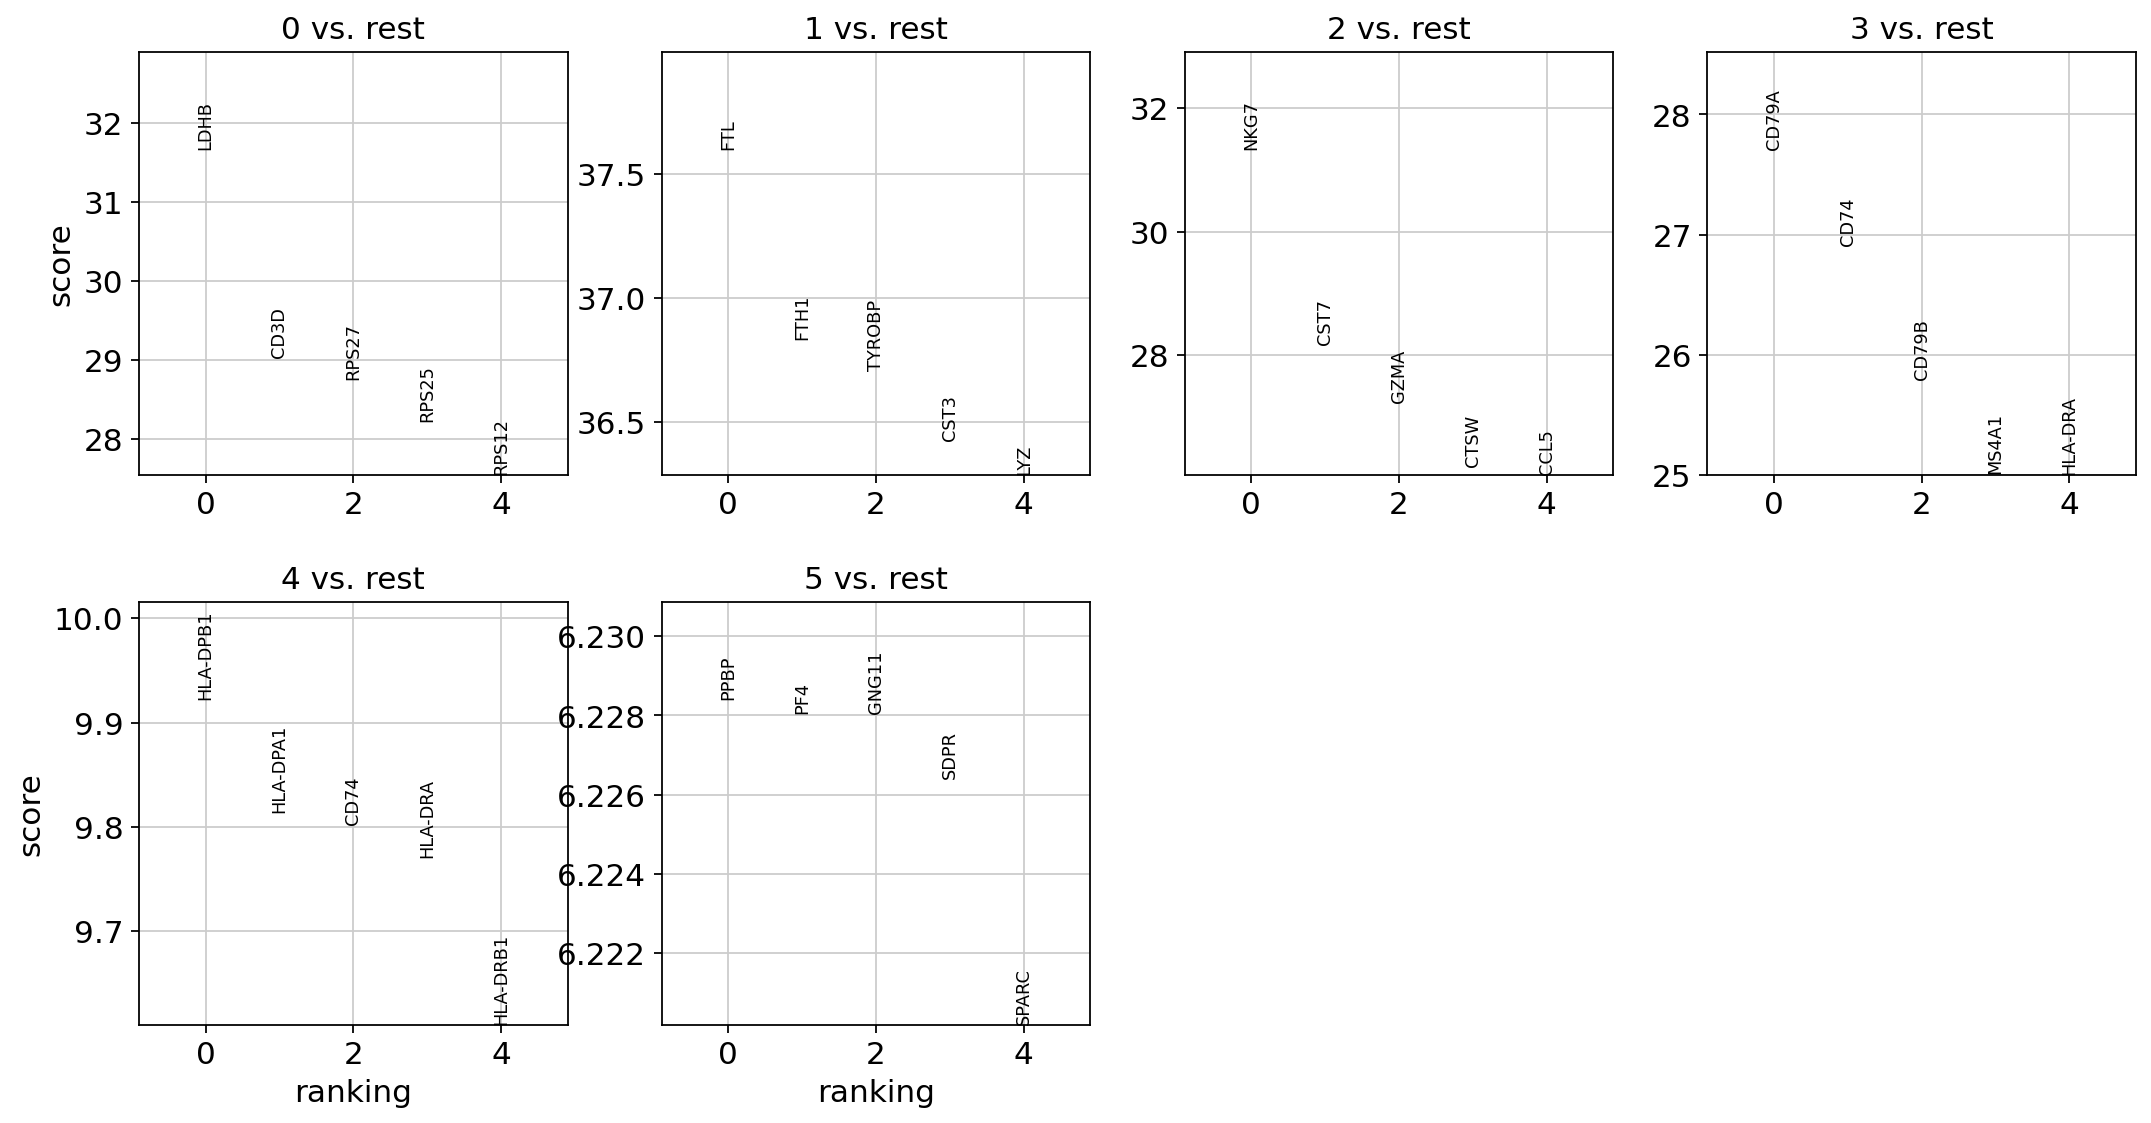

In [28]:
# Find marker genes for each cluster
print("Finding marker genes...")
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
print("Marker genes identified!")

# Visualize top 5 markers per cluster
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

### Get Marker Genes as a Table

In [ ]:
# Extract top marker genes for each cluster
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Create a nice dataframe
marker_genes = pd.DataFrame({
    group: result['names'][group][:10]  # Top 10 genes per cluster
    for group in groups
})

print("\n Top 10 Marker Genes per Cluster:")
marker_genes


🧬 Top 10 Marker Genes per Cluster:


0       1      2         3         4       5
0    LDHB     FTL   NKG7     CD79A  HLA-DPB1    PPBP
1    CD3D    FTH1   CST7      CD74  HLA-DPA1     PF4
2   RPS27  TYROBP   GZMA     CD79B      CD74   GNG11
3   RPS25    CST3   CTSW     MS4A1   HLA-DRA    SDPR
4   RPS12     LYZ   CCL5   HLA-DRA  HLA-DRB1   SPARC
5  RPS27A  S100A9   PRF1  HLA-DQA1  HLA-DQA1    NRGN
6   RPL31    AIF1  HLA-C  HLA-DPB1      CST3   RGS18
7    RPS3    LST1   GZMM  HLA-DQB1      LSP1    TPM4
8     LTB  LGALS1    B2M  HLA-DRB1   HLA-DMA    GPX1
9    RPL9  S100A6   GZMB      CD37  HLA-DRB5  TAGLN2

### YOUR MISSION: Identify Cell Types!

Now comes the biology part. For each cluster:
1. Look at the top marker genes
2. Ask your AI: *"What cell type expresses [gene1], [gene2], [gene3]?"*
3. Make your best guess about cell type identity

### Interactive Cell Type Identification:

In [ ]:
# Let's look at specific clusters in detail
cluster_to_check = '0'  # CHANGE THIS to explore different clusters (0, 1, 2, etc.)

# Get top 10 genes for this cluster
top_genes = result['names'][cluster_to_check][:10]
print(f"\n🔍 Top 10 marker genes for Cluster {cluster_to_check}:")
for i, gene in enumerate(top_genes, 1):
    print(f"  {i}. {gene}")

# Visualize these genes on UMAP
sc.pl.umap(adata, color=['leiden'] + list(top_genes[:4]),
           ncols=3, size=30)

### AI CHALLENGE #4:

1. Pick a cluster (change `cluster_to_check` above)
2. Note the top marker genes
3. Ask your AI: *"What immune cell type has high expression of [list 3-5 top genes]?"*
4. Write your answer below:

**Cluster 0 is probably:** ________________

**Why?** ________________________________

---

## Part 9: Annotate Clusters with Cell Types

Based on marker genes, here's a reasonable annotation for this PBMC dataset:

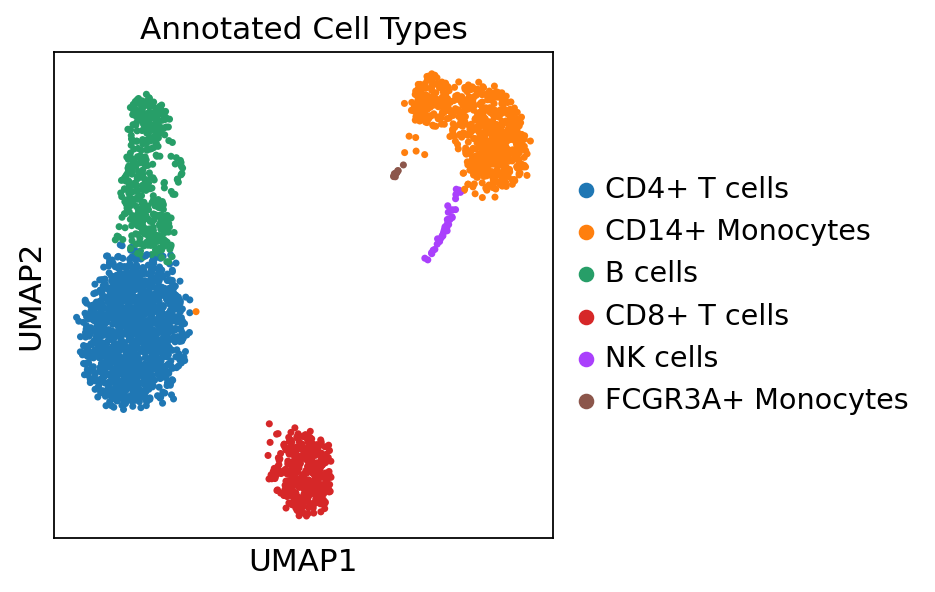

In [ ]:
# Create a mapping of cluster to cell type
# NOTE: These are example annotations - yours may differ!
cluster_names = {
    '0': 'CD4+ T cells',
    '1': 'CD14+ Monocytes',
    '2': 'B cells',
    '3': 'CD8+ T cells',
    '4': 'NK cells',
    '5': 'FCGR3A+ Monocytes',
    '6': 'Dendritic cells',
    '7': 'Megakaryocytes'
}

# Add cell type labels to data
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_names).astype('category')

# Visualize with cell type labels
sc.pl.umap(adata, color='cell_type', legend_loc='right margin',
           title='Annotated Cell Types', size=40)

### Beautiful Final Visualization

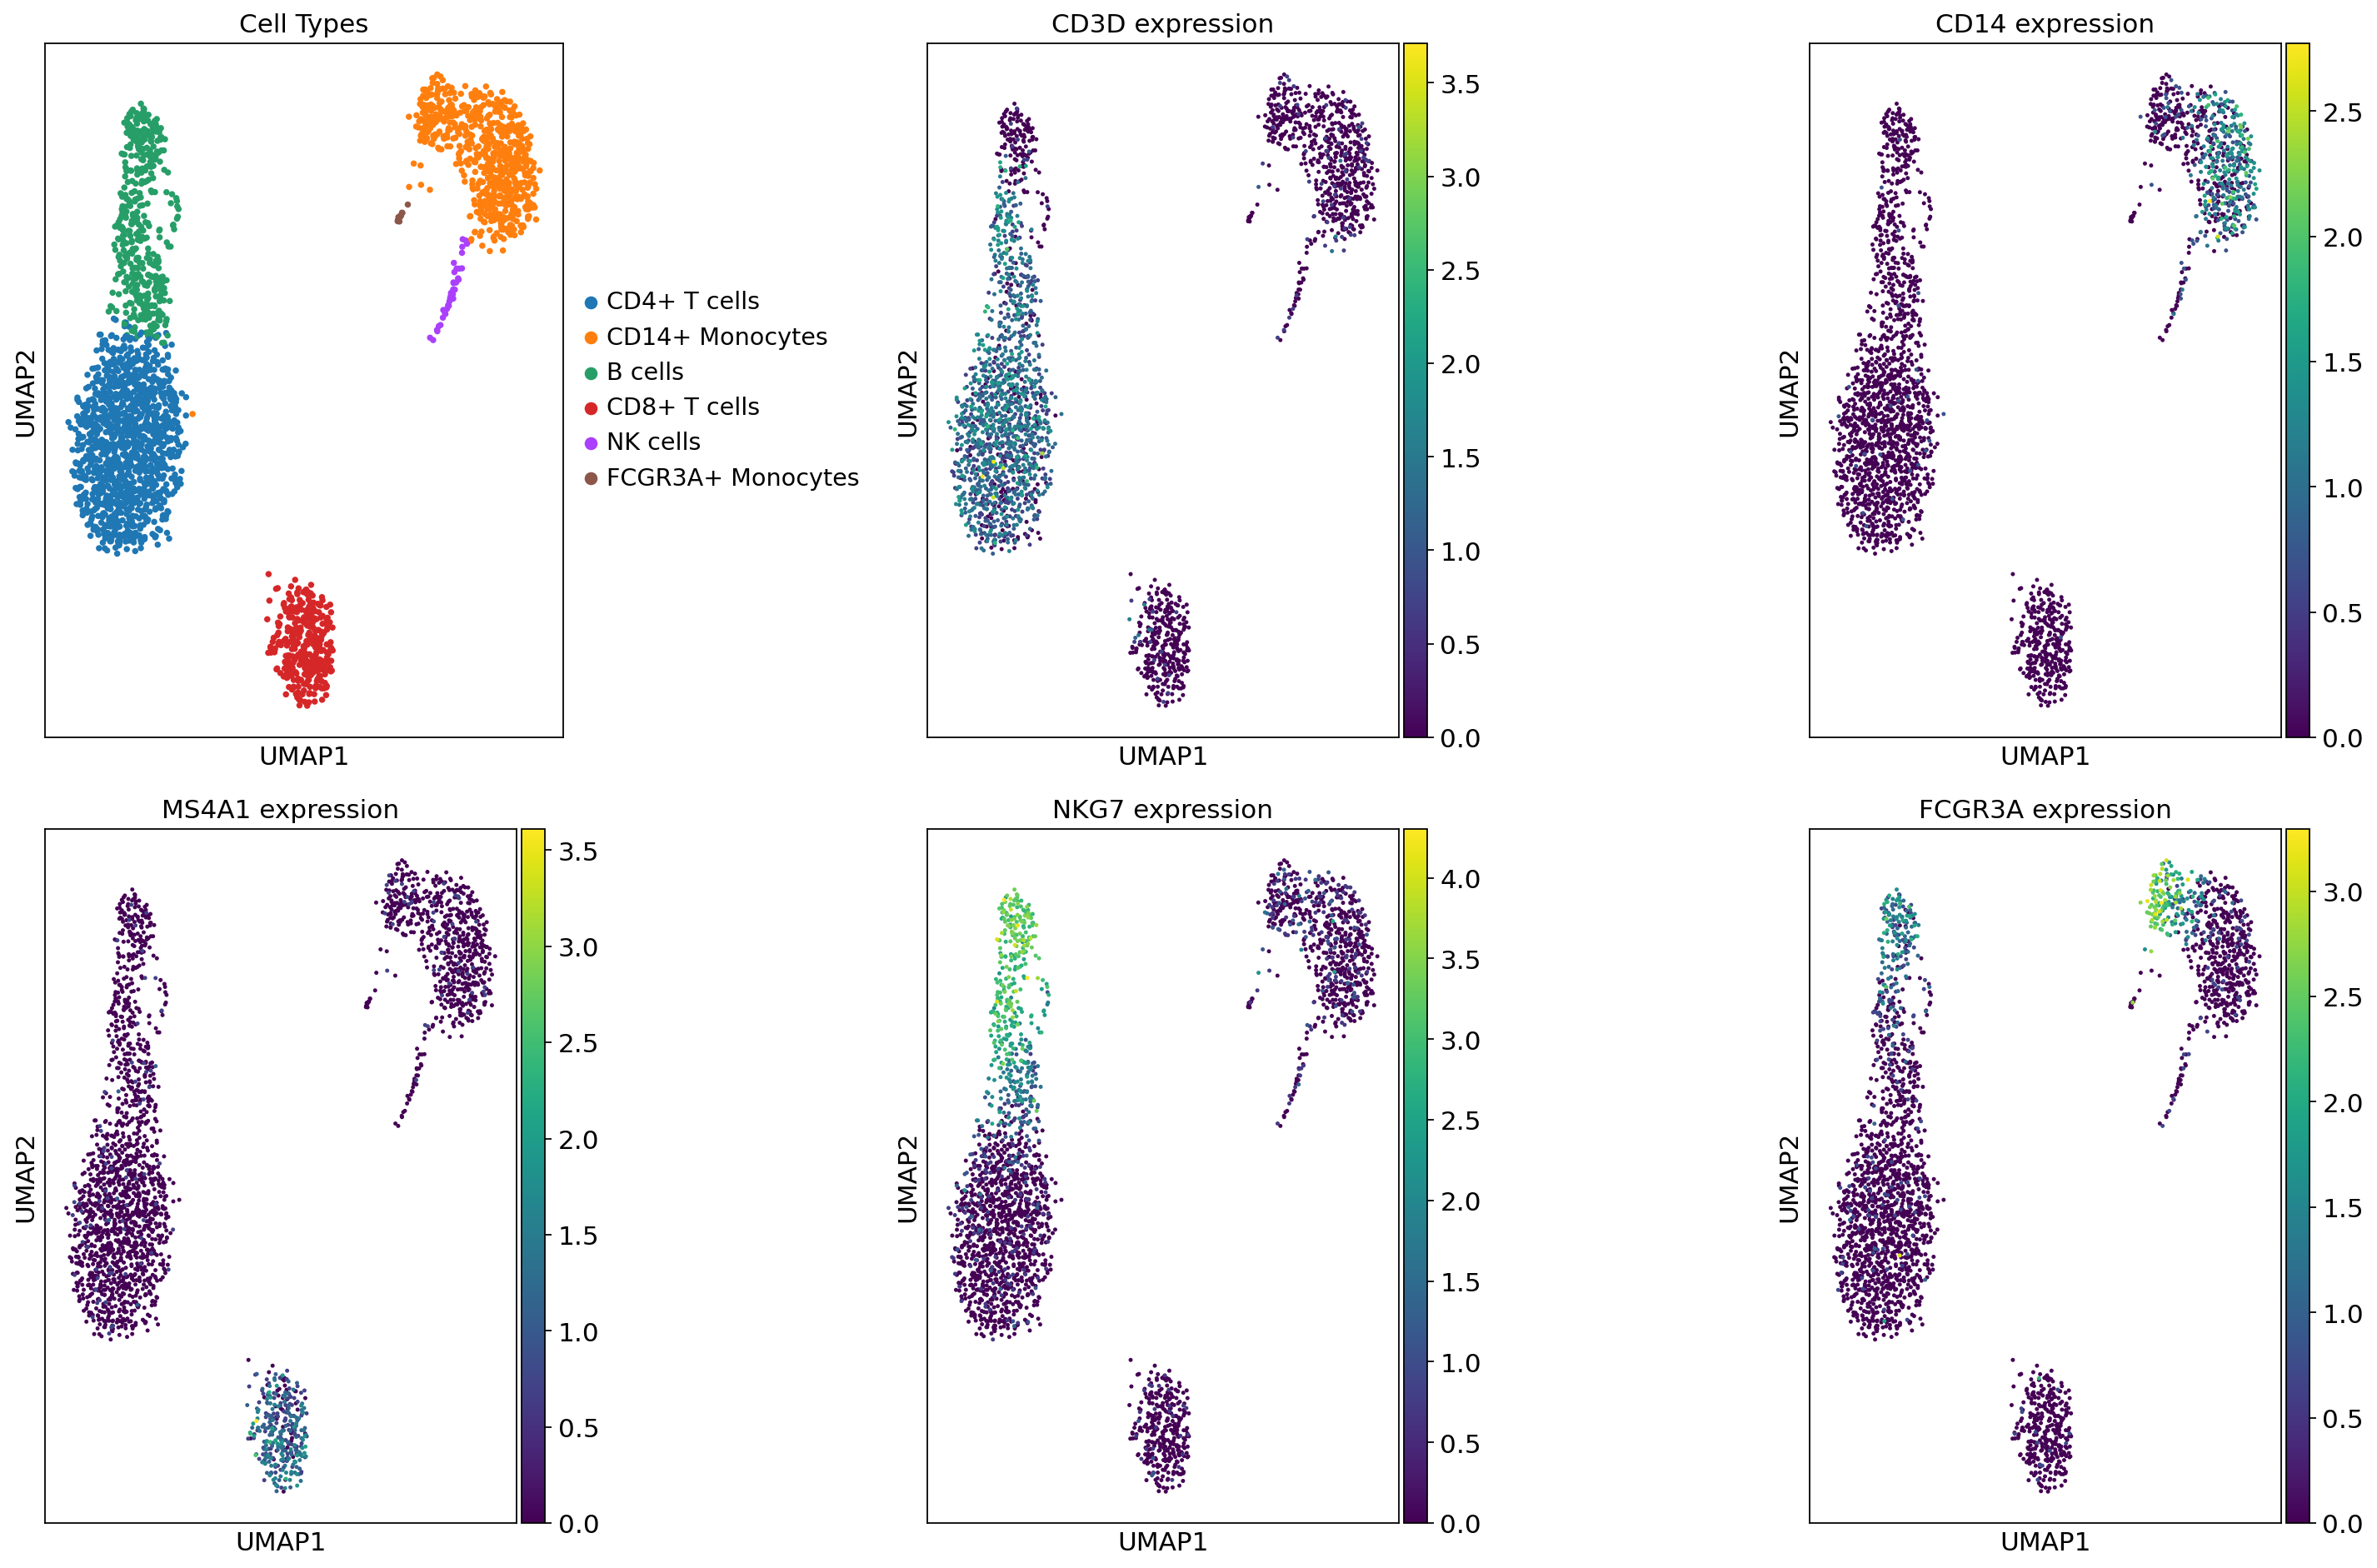

In [ ]:
# Create a comprehensive figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot 1: Cell types
sc.pl.umap(adata, color='cell_type', ax=axes[0], show=False, title='Cell Types')

# Plot 2-6: Key markers
markers = ['CD3D', 'CD14', 'MS4A1', 'NKG7', 'FCGR3A']
for i, marker in enumerate(markers, 1):
    sc.pl.umap(adata, color=marker, ax=axes[i], show=False,
               title=f'{marker} expression', size=20)

plt.tight_layout()
plt.show()

### Cell Type Composition


📊 Cell Type Composition:
        Cell Type  Count  Percentage
     CD4+ T cells   1194        45.3
  CD14+ Monocytes    636        24.1
          B cells    418        15.8
     CD8+ T cells    341        12.9
         NK cells     36         1.4
FCGR3A+ Monocytes     13         0.5


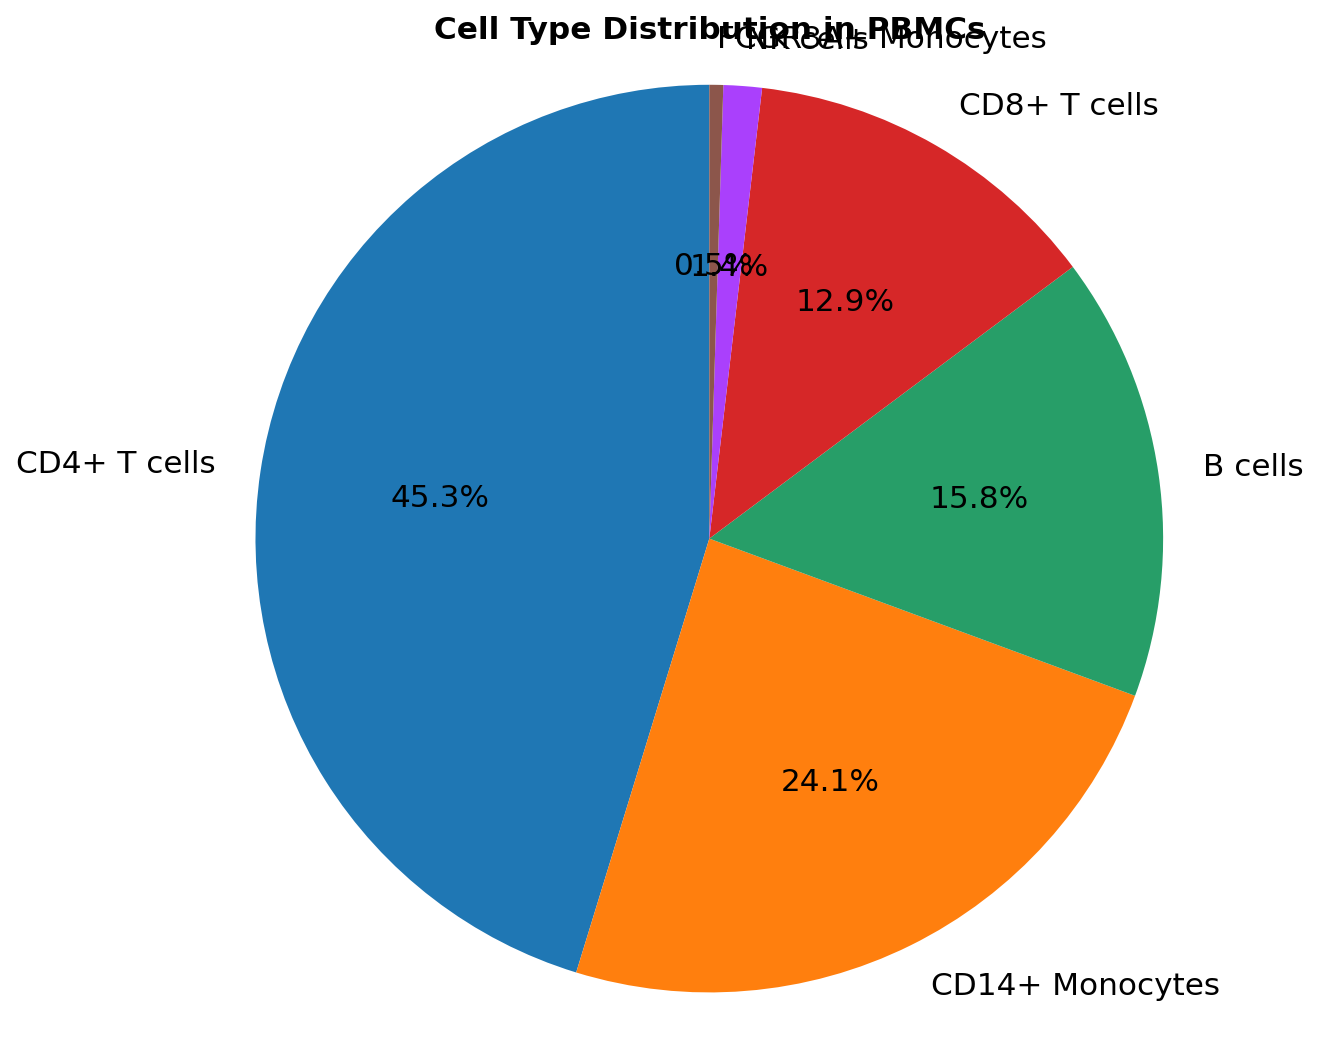

In [ ]:
# Count cells per type
cell_counts = adata.obs['cell_type'].value_counts()
cell_percentages = (cell_counts / cell_counts.sum() * 100).round(1)

# Create summary table
summary = pd.DataFrame({
    'Cell Type': cell_counts.index,
    'Count': cell_counts.values,
    'Percentage': cell_percentages.values
})

print("\n Cell Type Composition:")
print(summary.to_string(index=False))

# Visualize as pie chart
plt.figure(figsize=(8, 8))
plt.pie(cell_counts, labels=cell_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Cell Type Distribution in PBMCs', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

### Biological Interpretation:
- **T cells (CD4+ and CD8+)** are most abundant - they make up ~40-50% of PBMCs
- **Monocytes** are next - important for innate immunity
- **B cells** and **NK cells** are less common but crucial for adaptive immunity
- This distribution is typical for healthy blood!

---

## HANDS-ON CHALLENGE

Now it's your turn to dive deeper! Your instructor will assign you to a group.

### Group 1: T Cell Investigation

**Your mission:** Are there different T cell subtypes? What distinguishes them?

**Hints:**
1. Subset to T cells (clusters with CD3D expression)
2. Re-cluster at higher resolution
3. Find marker genes
4. Use AI to identify subtypes (naive, memory, regulatory, etc.)

---

### Group 2: Monocyte Analysis

**Your mission:** What are the differences between monocyte populations?

**Hints:**
1. Subset to monocytes (CD14+ and FCGR3A+ clusters)
2. Find differential genes between the two types
3. Use AI to understand functional differences
4. Which type is more inflammatory?

---

### GROUP 1: T Cell Analysis Code

📊 Subsetted to 1535 T cells


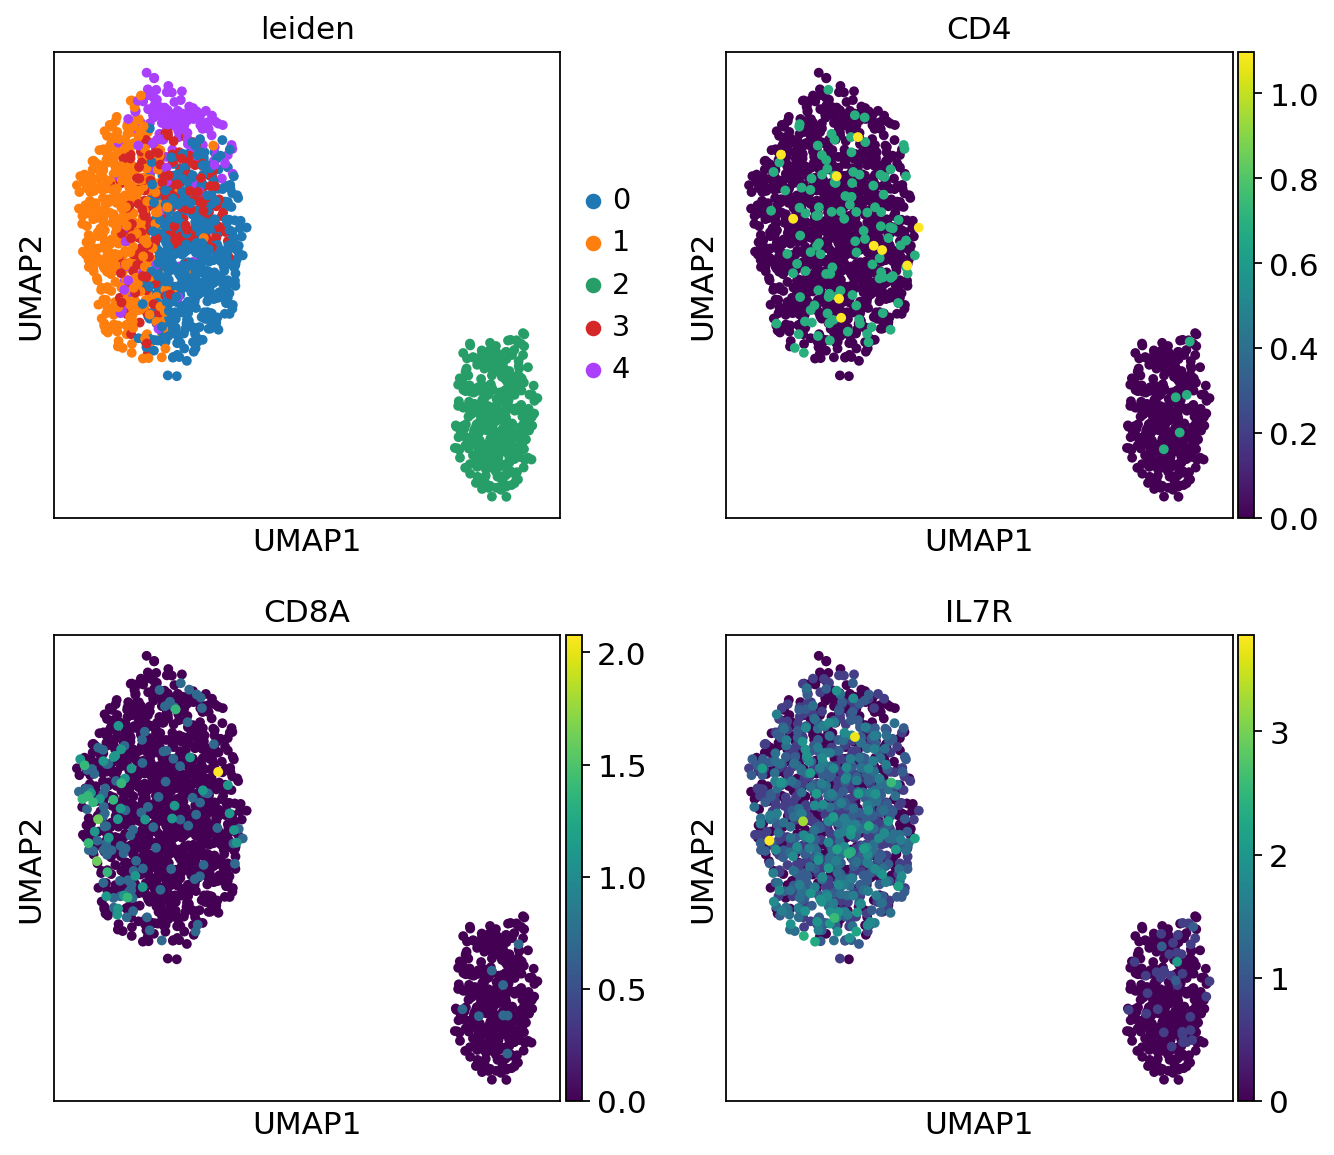

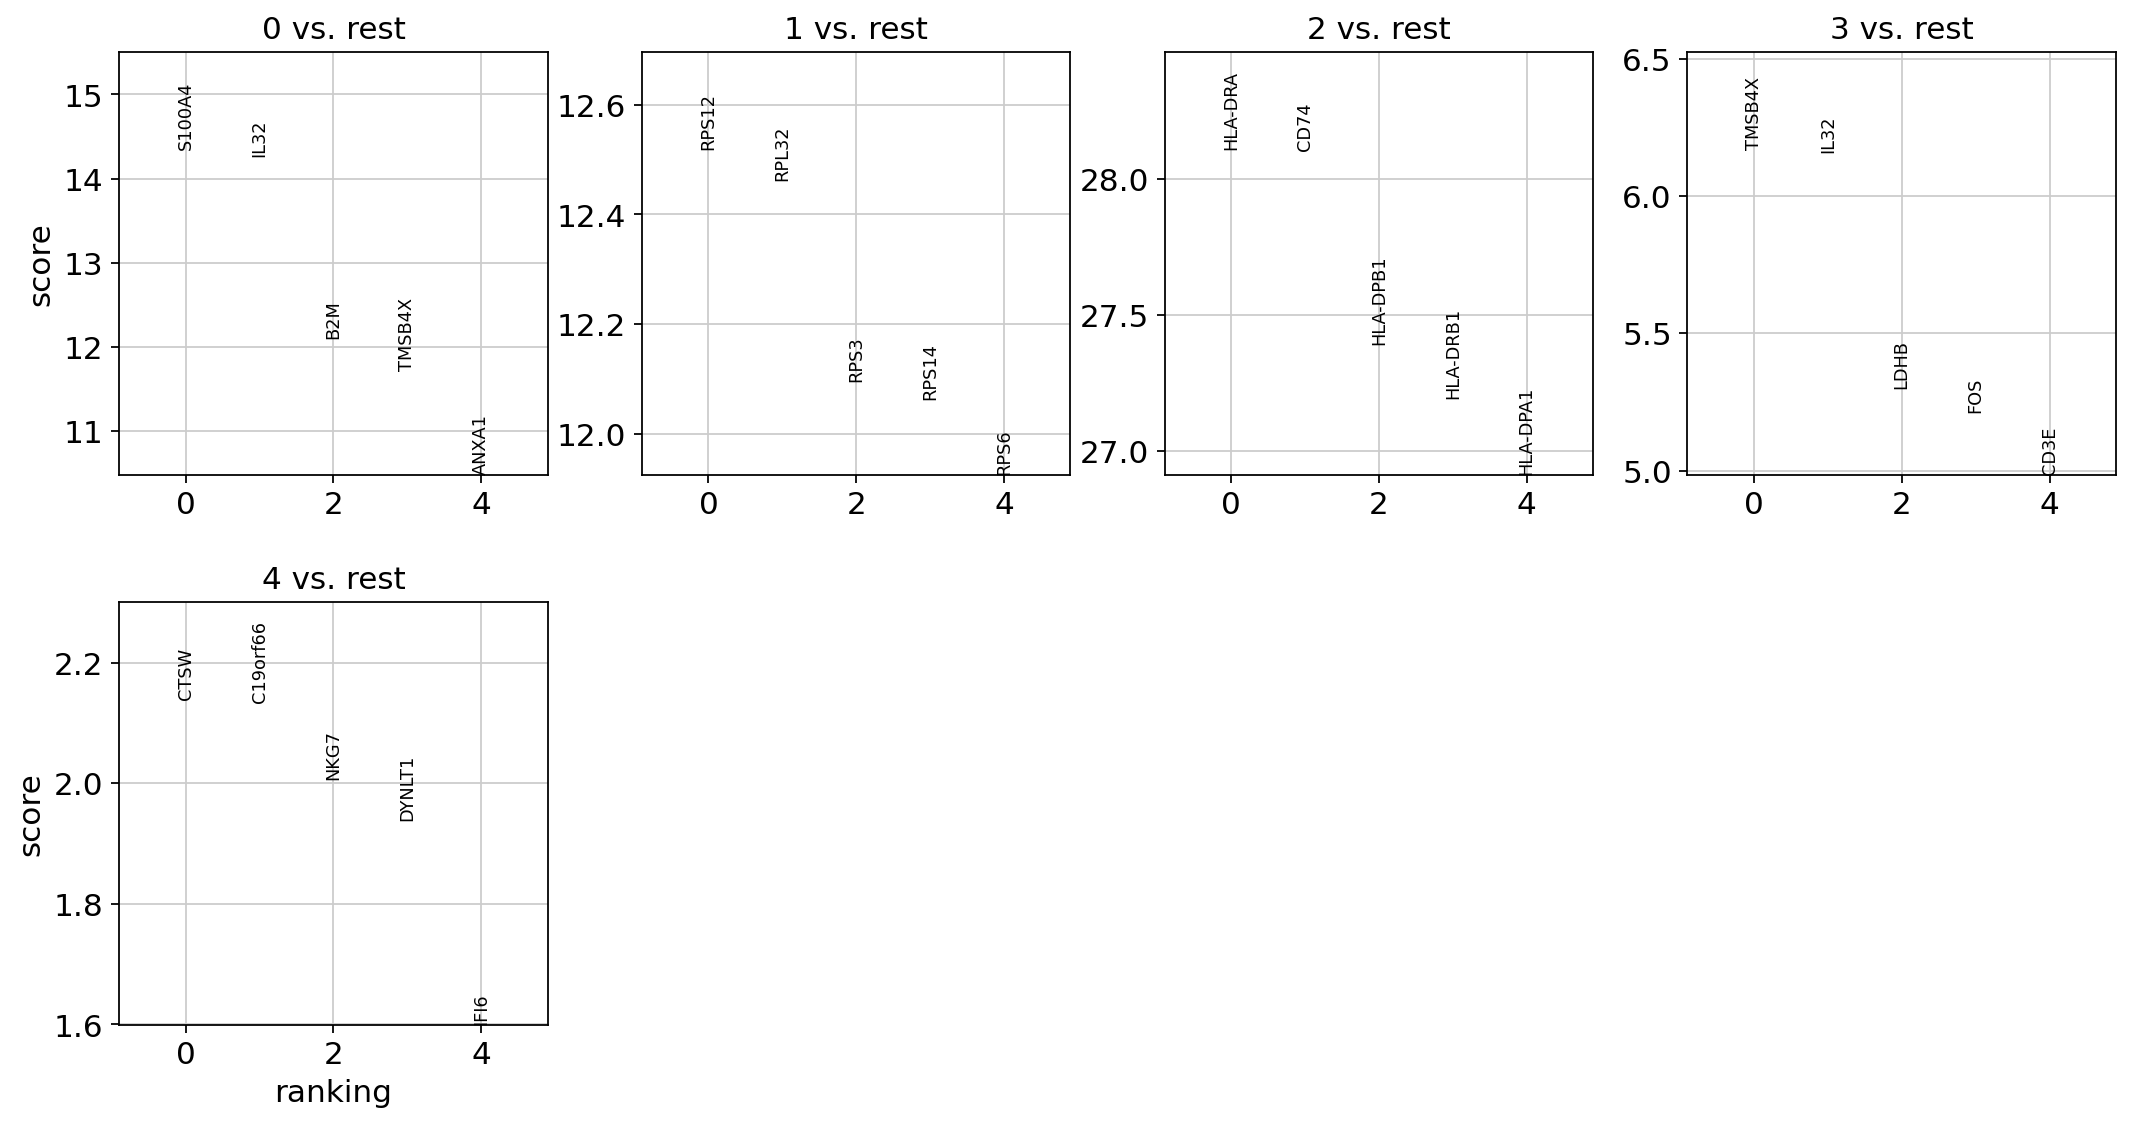


🧬 Top 10 Marker Genes per T Cell Cluster:
         0       1         2       3         4
0   S100A4   RPS12   HLA-DRA  TMSB4X      CTSW
1     IL32   RPL32      CD74    IL32  C19orf66
2      B2M    RPS3  HLA-DPB1    LDHB      NKG7
3   TMSB4X   RPS14  HLA-DRB1     FOS    DYNLT1
4    ANXA1    RPS6  HLA-DPA1    CD3E      IFI6
5     CD3D   RPL13     CD79A    CD3D      NEMF
6     IL7R   RPS3A     CD79B  RPS15A    SLC2A3
7      VIM  MALAT1  HLA-DQA1     VIM   PPP2R5C
8   S100A6   RPL31     MS4A1    APRT  CDC42SE2
9  S100A11    RPL3  HLA-DQB1  S100A6     APOL3


In [ ]:
# Group 1: T Cell Investigation

# Step 1: Subset to T cells
# Look at your cell_type annotations - which are T cells?
t_cell_types = ['CD4+ T cells', 'CD8+ T cells']  # Adjust based on your annotations
t_cells = adata[adata.obs['cell_type'].isin(t_cell_types)].copy()

print(f" Subsetted to {t_cells.n_obs} T cells")

# Step 2: Re-compute neighbors and UMAP on T cells only
sc.pp.neighbors(t_cells, n_neighbors=10, n_pcs=30)
sc.tl.umap(t_cells)

# Step 3: Re-cluster at higher resolution to find subtypes
sc.tl.leiden(t_cells, resolution=0.8)  # Higher resolution = more clusters

# Visualize
sc.pl.umap(t_cells, color=['leiden', 'CD4', 'CD8A', 'IL7R'], ncols=2)

# Step 4: Find marker genes for T cell subtypes
sc.tl.rank_genes_groups(t_cells, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(t_cells, n_genes=5, sharey=False)

# YOUR TURN:
# 1. Look at the marker genes for each cluster
# 2. Ask AI: "What T cell subtype expresses [genes]?"
# 3. Can you find naive, memory, or regulatory T cells?

# Get marker table
result_tcells = t_cells.uns['rank_genes_groups']
groups_tcells = result_tcells['names'].dtype.names

tcell_markers = pd.DataFrame({
    group: result_tcells['names'][group][:10]
    for group in groups_tcells
})

print("\n Top 10 Marker Genes per T Cell Cluster:")
print(tcell_markers)

### Group 1: Your Findings

**How many T cell subtypes did you find?** ___________

**What are they?**
1. Cluster 0: ___________
2. Cluster 1: ___________
3. Cluster 2: ___________

**Key marker genes you discovered:**
- ___________
- ___________
- ___________

**What did AI help you understand?**
___________________________________________________________

---

### GROUP 2: Monocyte Analysis Code

📊 Subsetted to 649 monocytes
   CD14+ : 636
   FCGR3A+: 13


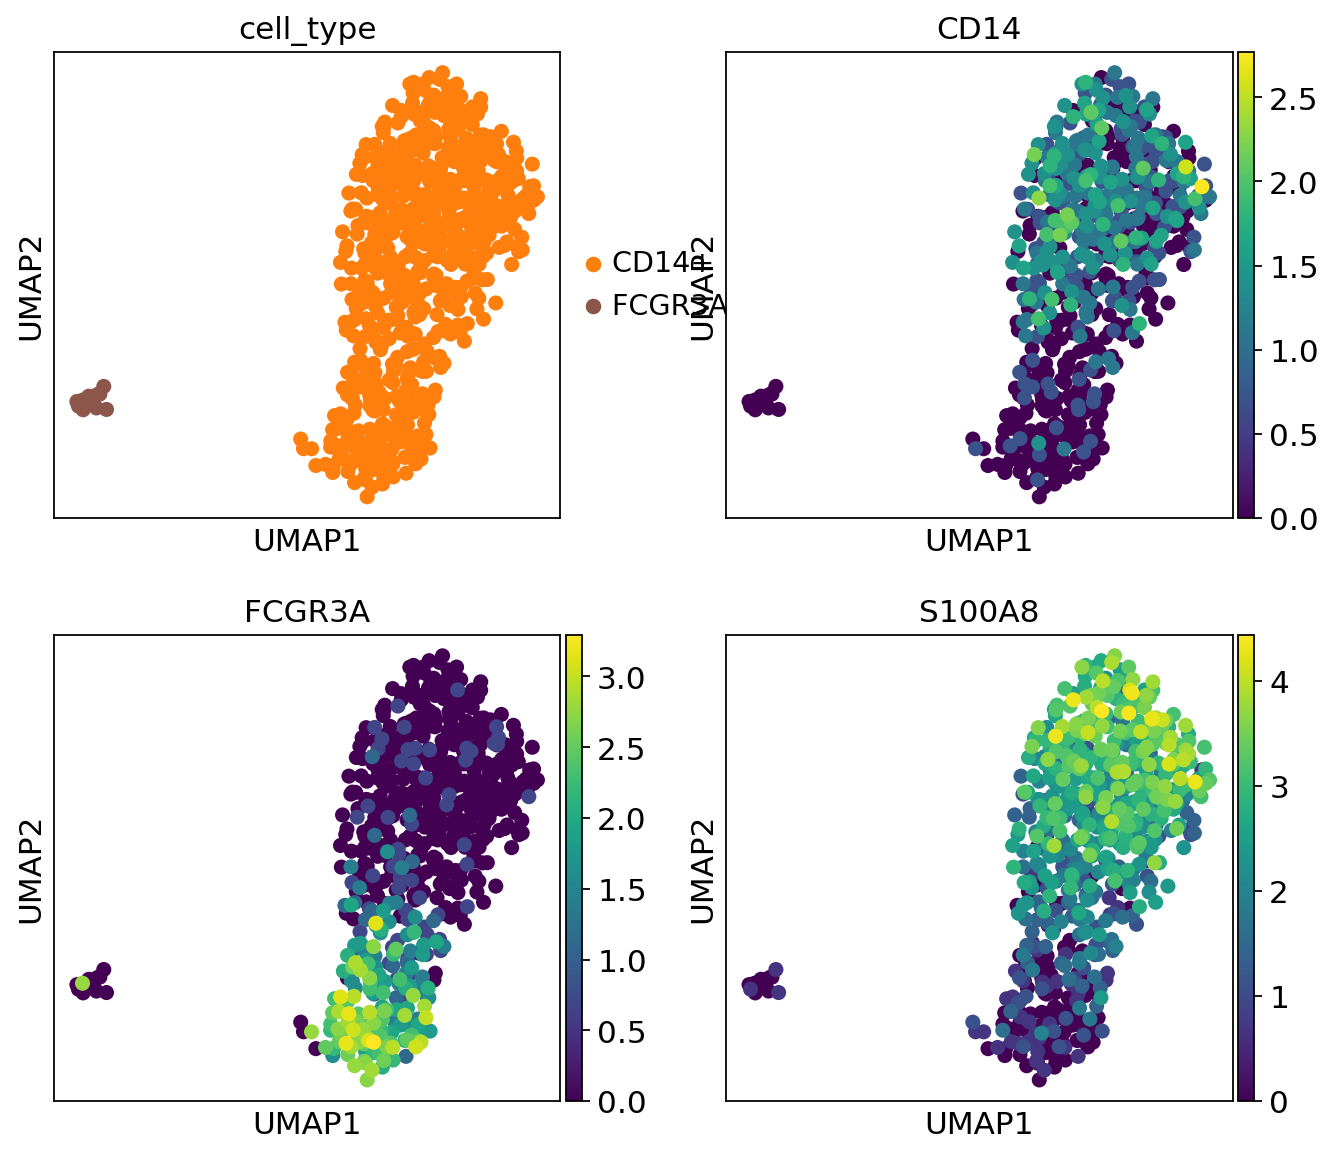

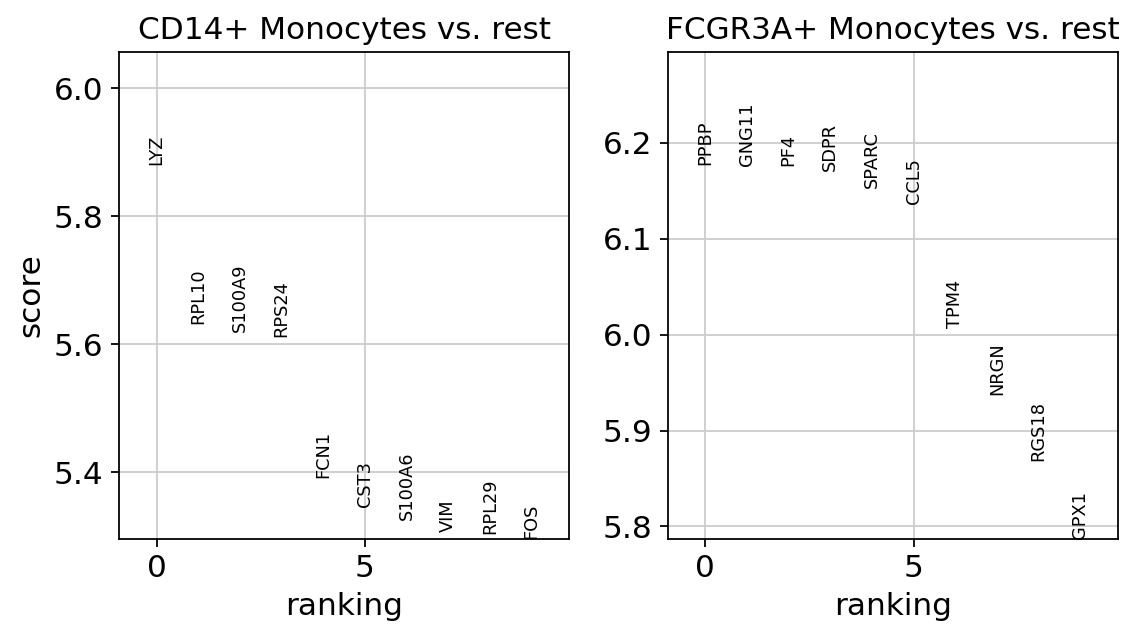


🧬 Top 15 Differential Genes:
   CD14+ Monocytes FCGR3A+ Monocytes
0              LYZ              PPBP
1            RPL10             GNG11
2           S100A9               PF4
3            RPS24              SDPR
4             FCN1             SPARC
5             CST3              CCL5
6           S100A6              TPM4
7              VIM              NRGN
8            RPL29             RGS18
9              FOS              GPX1
10           RPL14               GP9
11             FTL               CD9
12           RPL11         HIST1H2AC
13          TYROBP            TAGLN2
14          S100A4             RGS10


In [ ]:
# Group 2: Monocyte Investigation

# Step 1: Subset to monocytes
mono_types = ['CD14+ Monocytes', 'FCGR3A+ Monocytes']  # Adjust if needed
monocytes = adata[adata.obs['cell_type'].isin(mono_types)].copy()

print(f" Subsetted to {monocytes.n_obs} monocytes")
print(f"   CD14+ : {(monocytes.obs['cell_type'] == 'CD14+ Monocytes').sum()}")
print(f"   FCGR3A+: {(monocytes.obs['cell_type'] == 'FCGR3A+ Monocytes').sum()}")

# Step 2: Visualize monocytes
sc.pp.neighbors(monocytes, n_neighbors=10, n_pcs=30)
sc.tl.umap(monocytes)

sc.pl.umap(monocytes, color=['cell_type', 'CD14', 'FCGR3A', 'S100A8'], ncols=2)

# Step 3: Find genes that differ between the two types
sc.tl.rank_genes_groups(monocytes, 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(monocytes, n_genes=10, sharey=False)

# Get differential genes as table
result_mono = monocytes.uns['rank_genes_groups']
groups_mono = result_mono['names'].dtype.names

mono_markers = pd.DataFrame({
    group: result_mono['names'][group][:15]
    for group in groups_mono
})

print("\n Top 15 Differential Genes:")
print(mono_markers)

# YOUR TURN:
# 1. Compare the marker genes between CD14+ and FCGR3A+ monocytes
# 2. Ask AI: "What's the functional difference between CD14+ and CD16+ monocytes?"
# 3. Which type is more inflammatory?
# 4. Look for complement genes, inflammatory markers, etc.

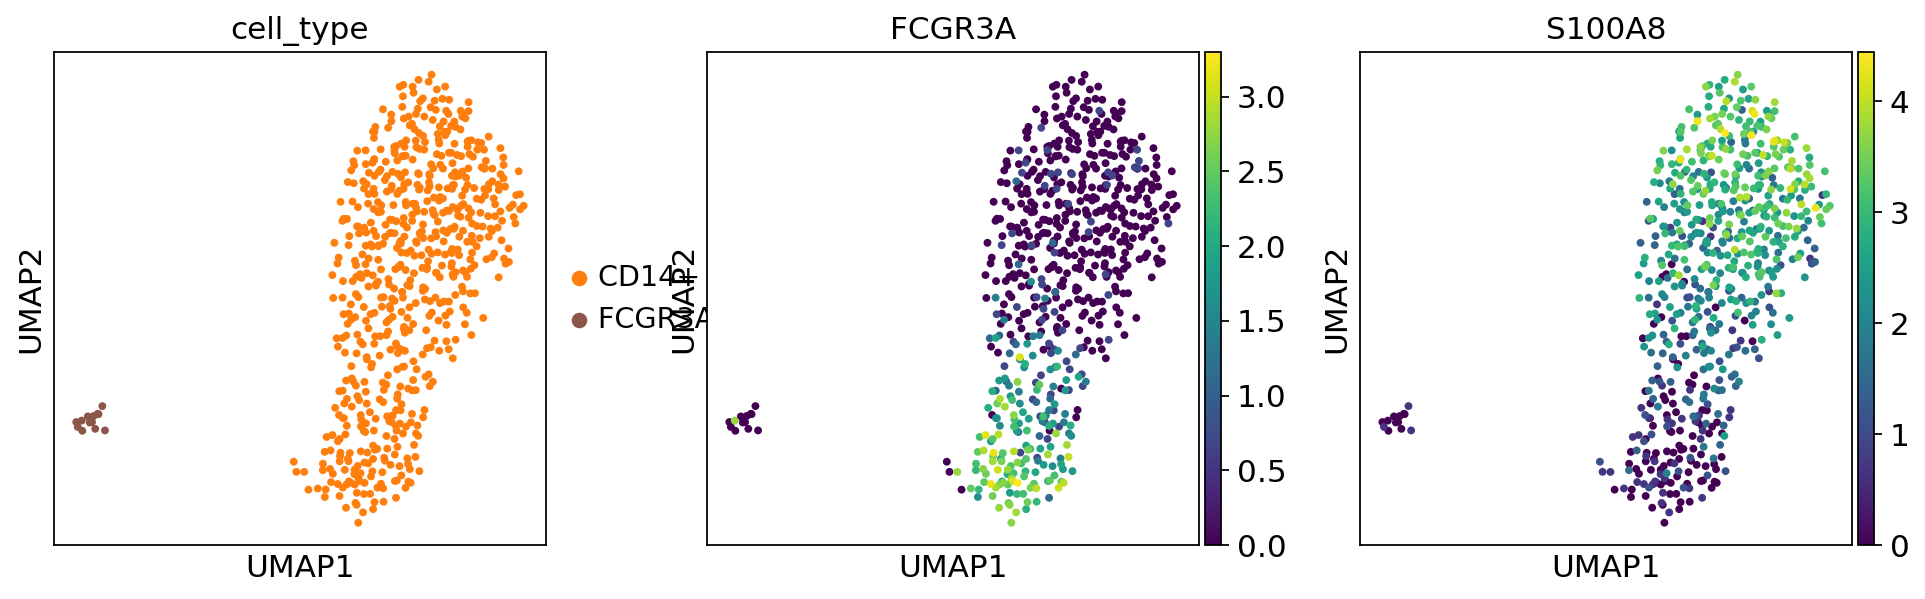

In [ ]:
# Visualize key differences
# These are some genes that often differ between monocyte types
genes_to_check = ['CD14', 'FCGR3A', 'S100A8', 'S100A9', 'LYZ', 'MS4A7']

# Filter to genes that exist in our dataset
genes_present = [g for g in genes_to_check if g in monocytes.var_names]

if len(genes_present) > 0:
    sc.pl.umap(monocytes, color=['cell_type'] + genes_present, ncols=3, size=50)
else:
    print("None of the typical monocyte markers found in dataset")

### Group 2: Your Findings

**Main differences between the two monocyte types:**
1. ___________________________________________________________
2. ___________________________________________________________
3. ___________________________________________________________

**Top markers for CD14+ monocytes:**
- ___________
- ___________
- ___________

**Top markers for FCGR3A+ monocytes:**
- ___________
- ___________
- ___________

**Which type is more inflammatory? Why?**
___________________________________________________________

**What did AI help you understand?**
___________________________________________________________

---

## Congratulations!

You've completed a full single-cell RNA-seq analysis pipeline!

### What You Learned:
1. ✓ Load and explore scRNA-seq data
2. ✓ Perform quality control
3. ✓ Apply PCA for dimensionality reduction
4. ✓ Visualize with UMAP
5. ✓ Identify clusters using Leiden algorithm
6. ✓ Find marker genes
7. ✓ Annotate cell types
8. ✓ Use AI to accelerate analysis

### Next Steps:

**Apply This to Your Research:**
- Use this notebook as a template for your own data
- Modify parameters to suit your experiment
- Add your own biological questions

**Learn More:**
- **Scanpy tutorials**: https://scanpy-tutorials.readthedocs.io/
- **Best practices**: https://www.sc-best-practices.org/
- **Public datasets**: https://www.10xgenomics.com/datasets

**Advanced Topics to Explore:**
- Trajectory inference (pseudotime)
- RNA velocity
- Integration of multiple samples
- Spatial transcriptomics
- Gene regulatory networks

### AI Tips for Bioinformatics:

**Good prompts:**
- "Explain [concept] in the context of single-cell RNA-seq"
- "Give me scanpy code to [specific task]"
- "Why am I getting this error? [paste error message]"
- "What cell type expresses [gene1], [gene2], [gene3]?"

**Remember:**
- AI is a tool to accelerate learning, not replace understanding
- Always verify biological claims with literature
- Use AI to debug, explain, and explore - not just copy-paste

---

## Save Your Work

Don't forget to download this notebook and any plots you want to keep!

In [ ]:
# Optional: Save the analyzed data for later use
# adata.write('pbmc3k_analyzed.h5ad')

# Optional: Export cell type annotations
# adata.obs[['cell_type']].to_csv('cell_type_annotations.csv')

print("Analysis complete! Great work! 🎉")

---

### Questions?


### Feedback Welcome!

What worked well? What was confusing? How can we improve this workshop?

---

*Workshop created for BME graduate students | Powered by Scanpy, Python, and AI*